In [12]:
library("plot.matrix")
library("RColorBrewer")
library("ggpubr")
library("stringr")
library("caret")
library("svglite")
library("VIM")
library("pheatmap")
library("naivebayes")

setwd("/media/scott/Zapdos/prss_analysis")
out_name <- function(x){ paste("/media/scott/Zapdos/prss_analysis/notebook_output/", x, sep="")}

source("read_helper.R")
source("function_helper.R")

In [2]:
load_sequencing_data()

[1] "LOADING SEQUENCING DATA"
[1] "PHENOTYPE DATA: seq.df"
[1] "GENOTYPE MATRIX: gt.matrix"
[1] "HAPLOTYPE MATRIX: hap.matrix"
[1] "-----------------------"
[1] "FILTERING VARIANTS BETWEEN 779590:779600 (low confidence homopolymer T calls)"
[1] "FILTERING VARIANTS THAT SHARE POS WITH OTHER VARIANTS"
[1] "FILTERING 3 SAMPLES"
[1] "FILTERING VARIANTS WITH MINOR ALLELE COUNT < 3"
[1] "MINOR ALLELE COUNTS: variant.df"
[1] "-----------------------"
[1] "# individuals = 357"
[1] "# variants = 1163"
[1] "HAPLOTYPE DELETION STATUS: del.status"
[1] "-----------------------"


In [3]:
load_gwas_results()
GWAS_TOP=750284
GWAS_TOP2=823812

[1] "LOADING GWAS RESULT DATA"
[1] "LIFTING OVER"
[1] "CORRECTING INVERTED REF/ALT RELATIONSHIPS"
[1] "ALL GWAS DATA: full.gwas.df"
[1] "427/2963 of liftover variants matched sequencing calls."
[1] "SUBSETTED GWAS DATA: gwas.df"


In [4]:
# takes a while...
load_array_data(gwas.df)
load_sample_overlap(array.df$sample, colnames(gt.matrix))

[1] "LOADING MICROARRAY DATA (be patient)"
[1] "CORRECTING INVERTED REF/ALT RELATIONSHIPS"
[1] "# samples: 6831"
[1] "----------------"
[1] "MI status:"
[1] "----------------"
[1] "Cohorts:"
[1] "----------------"
[1] "Platforms:"
[1] "GENOTYPE DATA: array.matrix"
[1] "PHENOTYPE DATA: array.df"
[1] "LOADING OVERLAP DATA"
[1] "69 SAMPLES OVERLAP"
[1] "OVERLAPING INFO: overlap.df"


In [5]:
# takes a while...
load_liftover_array_data(gwas.df)

[1] "LOADING LIFTOVER DATA"
[1] "CORRECTING INVERTED REF/ALT RELATIONSHIPS"
[1] "IMPUTED ARRAY MATRIX: imputed.matrix"


In [6]:
# takes a while...
load_imputed_array_data()

[1] "LOADING IMPUTED DATA"
[1] "GENOTYPE MATRIX: imputed.gt.matrix"
[1] "HAPLOTYPE MATRIX: imputed.hap.matrix"
[1] "DOSAGE MATRIX: imputed.ds.matrix"
[1] "IMPUTATION QUALITY: quality.df"


In [7]:
load_gtex_genotypes()
load_imputed_gtex()
load_gtex_eqtl()

[1] "LOADING GTEX WGS DATA"
[1] "GTEX MATRIX: gtex.matrix"
[1] "GTEX PHENOTYPES: gtex.df"
[1] "GTEX HAPLOGROUPS: gtex.haps"
[1] "LOADING GTEX IMPUTED DATA"
[1] "GENOTYPE MATRIX: imputed.gtex.matrix"
[1] "HAPLOTYPE MATRIX: imputed.gtex.hap.matrix"
[1] "DOSAGE MATRIX: imputed.gtex.ds.matrix"
[1] "IMPUTATION QUALITY: gtex.quality.df"
[1] "PAIR DATA: pair.df"
[1] "PAIR DATA, NO HOMOZYGOUS DEL: pair.nohom.df"
[1] "GTEx v8 PAIR DATA: pair.v8.df"
[1] "GENE EXPRESSION: gtex.expression.df"


In [8]:
load_imputed_gtex()

[1] "LOADING GTEX IMPUTED DATA"
[1] "GENOTYPE MATRIX: imputed.gtex.matrix"
[1] "HAPLOTYPE MATRIX: imputed.gtex.hap.matrix"
[1] "DOSAGE MATRIX: imputed.gtex.ds.matrix"
[1] "IMPUTATION QUALITY: gtex.quality.df"


In [100]:
source("read_helper.R")
load_gtex_pancreas()

[1] "GTEx v8 PANCREAS DATA: pancreas.v8.df"


In [43]:
LD_START <- 729701
LD_END <- 805034
LD_MID <- (750284 + 750699)/2

In [284]:
#defined by gtex eqtls for PRSS3P2
SIG_POS = c("761960","762102","762185","762213","768638","769277","769685","769703","769943","770037",
           "770094","770118","770123","770208","770823","770840","771067","771340","771343","771346",
           "771423","771646","771876","772061","772165","772182","772262","772347","772356","772398",
           "772561","773182","773325","773354","773501","773517","773643","773732","773850","774035",
           "774060","774573","774686","774758","774860","774883","774887","774999","775074","775277",
           "775285","775367","775558","775607","775685","775700","775721","775753","775980","776122",
           "776336","776613","776812","776930","777302","777336","777343","777442","777581","778107",
           "778128","778150","778259","778352","778692","778788","778807","778844","778866","778991",
           "779100","779110","779422","779445","779775","779850","779920","780105","780727","781320",
           "781856","782078")



#cluster-informative snps in/around deletion (0=ref, 1=alt)
A0=c("772165", "773850", "774860", "775285", "776812", "777336", "778807", "779110", "780105")
A1=c("770823", "770840", "771067", "771340", "771343", "771423", "771646", "771876", "772061",
     "772182", "772262", "772347", "772356", "772398", "772561", "773182", "773325", "773354",
     "773501", "773643", "773732", "774035", "774060", "774573", "774686", "774758", "774883",
     "774887", "774999", "775074", "775277", "775367", "775558", "775607", "775685", "775700",
     "775721", "775753", "775980", "776122", "776336", "776613", "776930", "777302", "777343",
     "777442", "777581", "778107", "778128", "778150", "778259", "778352", "778692", "778788",
     "778844", "778866", "778991", "779100", "779422", "779445", "779775", "779850", "779920",
     "780727", "781320", "781856", "782078")

## LOCUS FOCUS OUTPUT

In [266]:
locus.df <- gwas.df
locus.df <- merge(pair.df[pair.df$gene=="PRSS2",], locus.df, by="pos")

locus.df <- locus.df[,c("chr.38", "pos.38", "a1", "a2", "snp", "p")]
locus.df <- locus.df[locus.df$chr.38 == "chr7",]
locus.df$chr.38 <- gsub("chr", "", locus.df$chr.38)
paste("Region=",locus.df$chr.38[1],":", min(locus.df$pos.38)-100, "-", max(locus.df$pos.38)+100, sep="")
colnames(locus.df) <- c("#CHROM", "POS", "REF", "ALT", "ID", "P")
head(locus.df)

write.table(locus.df, "locus_focus.txt", sep="\t", quote=F, row.names=F)

[1] "Region=7:142697711-142877015"

#CHROM POS       REF ALT ID         P        
1 7      142697811 C   T   rs1972277  0.2644089
2 7      142698555 G   A   rs1812000  0.2575255
3 7      142698754 C   A   rs1812001  0.2570428
4 7      142698925 C   A   rs2213212  0.0749025
5 7      142699075 A   G   rs10249729 0.2675462
6 7      142699172 G   A   rs2367342  0.2552973

## CORRELATION TO DELETION

In [267]:
variant.df <- variant.df[,c("pos", "alt.count", "mac", "outside")]
ld.df <- do.call(rbind, ( lapply(rownames(hap.matrix), FUN=calculate_ld, y=del.status)) )
ld.df <- ld.df[!is.na(ld.df$pos),]
variant.df <- merge(variant.df, ld.df, by="pos", all.x=TRUE)
variant.df$maf <- sapply(variant.df$pos, get_maf, hapmat=hap.matrix)

array.variant.df <- variant.df[,c("pos", "outside")]
array.variant.df <- data.frame(pos=rownames(imputed.hap.matrix),
                    maf=sapply(rownames(imputed.hap.matrix), get_maf, hapmat=imputed.hap.matrix))

#snp.df <- data.frame(gt=gt.matrix[rownames(gt.matrix) == GWAS_TOP2,], sample=colnames(gt.matrix))
#snp.df <- merge(snp.df, seq.df, by="sample", all.x=TRUE)
#snp.df <- snp.df[snp.df$pi == "PI" & snp.df$mi %in% c(0,1),]
#snp.df <- na.omit(snp.df)

#for (i in c(0,1,2)){ print(mean(snp.df[snp.df$gt == i & snp.df$del == 2-i,]$mi)) }
#for (i in c(0,1,2)){ print(nrow(snp.df[snp.df$gt == i & snp.df$del == 2-i,])) }

In [268]:
df <- data.frame(gt=hap.matrix[rownames(hap.matrix)==GWAS_TOP,], del=del.status)
sum(df$gt == df$del)/nrow(df)
sum(df$gt == 1 & df$del==1)
sum(df$gt == 1 & df$del==1)/sum(df$gt == 1)

print("-----")
mean(df$gt)
mean(df$del)

[1] 0.952381

[1] 280

[1] 0.9859155

[1] "-----"


[1] 0.3977591

[1] 0.4341737

In [11]:
mean(del.status)
length(del.status)/2

common.deletion.paper <- c("rs13230029", "rs4726581", "rs4726582", "rs4726583",
                            "rs2734212", "rs2734213","rs2855983", "rs2734218")

highest.ld <- merge(variant.df, gwas.df[,c("pos", "snp", "p")])
highest.ld <- highest.ld[order(-highest.ld$r2),]
highest.ld[highest.ld$snp %in% common.deletion.paper,]

highest.ld[(highest.ld$pos < GAP_START | highest.ld$pos > GAP_END) & highest.ld$r2 > 0.95,]


[1] 0.4341737

[1] 357

pos    alt.count mac outside d          dprime r2        maf      
138 767185 397       317 TRUE    -0.2414103 -1     0.9609739 0.4439776
125 761962 396       318 TRUE    -0.2413758 -1     0.9608631 0.4438202
140 767350 396       318 TRUE    -0.2408022 -1     0.9555390 0.4453782
139 767346 395       319 TRUE    -0.2407662 -1     0.9554133 0.4452247
    snp        p           
138 rs4726581  1.383815e-06
125 rs13230029 1.140117e-06
140 rs4726583  1.361120e-06
139 rs4726582  1.361193e-06

pos    alt.count mac outside d          dprime    r2        maf      
127 762935 313       313 TRUE     0.2438426  1.000000 0.9830608 0.4383754
128 763937 313       313 TRUE     0.2438426  1.000000 0.9830608 0.4383754
141 767784 313       313 TRUE     0.2438426  1.000000 0.9830608 0.4383754
142 767786 313       313 TRUE     0.2438426  1.000000 0.9830608 0.4383754
150 769685 313       313 TRUE     0.2438426  1.000000 0.9830608 0.4383754
145 768183 312       312 TRUE     0.2438139  1.000000 0.9830120 0.4382022
147 768212 312       312 TRUE     0.2438139  1.000000 0.9830120 0.4382022
118 758667 398       316 TRUE    -0.2425948 -1.000000 0.9718670 0.4410112
135 765320 309       309 TRUE     0.2420733  0.988561 0.9716952 0.4327731
104 750699 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
110 755059 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
129 764089 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
133 765036 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
136 765437 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
137 766090 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
138 767185 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
144 767934 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
146 768210 397       317 TRUE    -0.2414103 -1.000000 0.9609739 0.4439776
123 761200 396       318 TRUE    -0.2413758 -1.000000 0.9608631 0.4438202
125 761962 396       318 TRUE    -0.2413758 -1.000000 0.9608631 0.4438202
111 755611 396       318 TRUE    -0.2408022 -1.000000 0.9555390 0.4453782
115 757419 396       318 TRUE    -0.2408022 -1.000000 0.9555390 0.4453782
140 767350 396       318 TRUE    -0.2408022 -1.000000 0.9555390 0.4453782
143 767842 396       318 TRUE    -0.2408022 -1.000000 0.9555390 0.4453782
121 761088 395       319 TRUE    -0.2407662 -1.000000 0.9554133 0.4452247
124 761517 395       319 TRUE    -0.2407662 -1.000000 0.9554133 0.4452247
139 767346 395       319 TRUE    -0.2407662 -1.000000 0.9554133 0.4452247
126 762010 398       316 TRUE    -0.2406178 -0.994213 0.9552899 0.4425770
130 764683 398       316 TRUE    -0.2406178 -0.994213 0.9552899 0.4425770
131 764688 398       316 TRUE    -0.2406178 -0.994213 0.9552899 0.4425770
106 751878 395       319 TRUE    -0.2401941 -1.000000 0.9501381 0.4467787
112 756024 395       319 TRUE    -0.2401941 -1.000000 0.9501381 0.4467787
NA      NA  NA        NA   NA            NA        NA        NA        NA
    snp        p           
127 rs1969595  8.112730e-07
128 rs13225332 8.253805e-07
141 rs4726585  1.043578e-06
142 rs4726586  1.043079e-06
150 rs10952532 1.197909e-06
145 rs13229600 1.026997e-06
147 rs13228878 1.020842e-06
118 rs2855972  7.823655e-07
135 rs3752404  2.173592e-06
104 rs9969188  3.688519e-07
110 rs6666     3.888813e-07
129 rs11765409 1.164679e-06
133 rs11769872 1.101469e-06
136 rs10952531 1.263533e-06
137 rs56225909 1.283614e-06
138 rs4726581  1.383815e-06
144 rs4726588  1.438361e-06
146 rs13229701 1.497032e-06
123 rs35031873 1.110524e-06
125 rs13230029 1.140117e-06
111 rs6667     3.982644e-07
115 rs4726577  4.422569e-07
140 rs4726583  1.361120e-06
143 rs34500324 1.444245e-06
121 rs13246726 1.444985e-06
124 rs55833042 1.125909e-06
139 rs4726582  1.361193e-06
126 rs13230134 1.145820e-06
130 rs12534573 1.227471e-06
131 rs12534595 1.229545e-06
106 rs4726576  4.803495e-07
112 rs10231771 4.528557e-07
NA  NA                   NA

---
# GWAS DATA

### Lifted-over original GWAS data to alternative contig

Warning message:
“Removed 118 rows containing missing values (geom_point).”
Warning message:
“Removed 118 rows containing missing values (geom_point).”


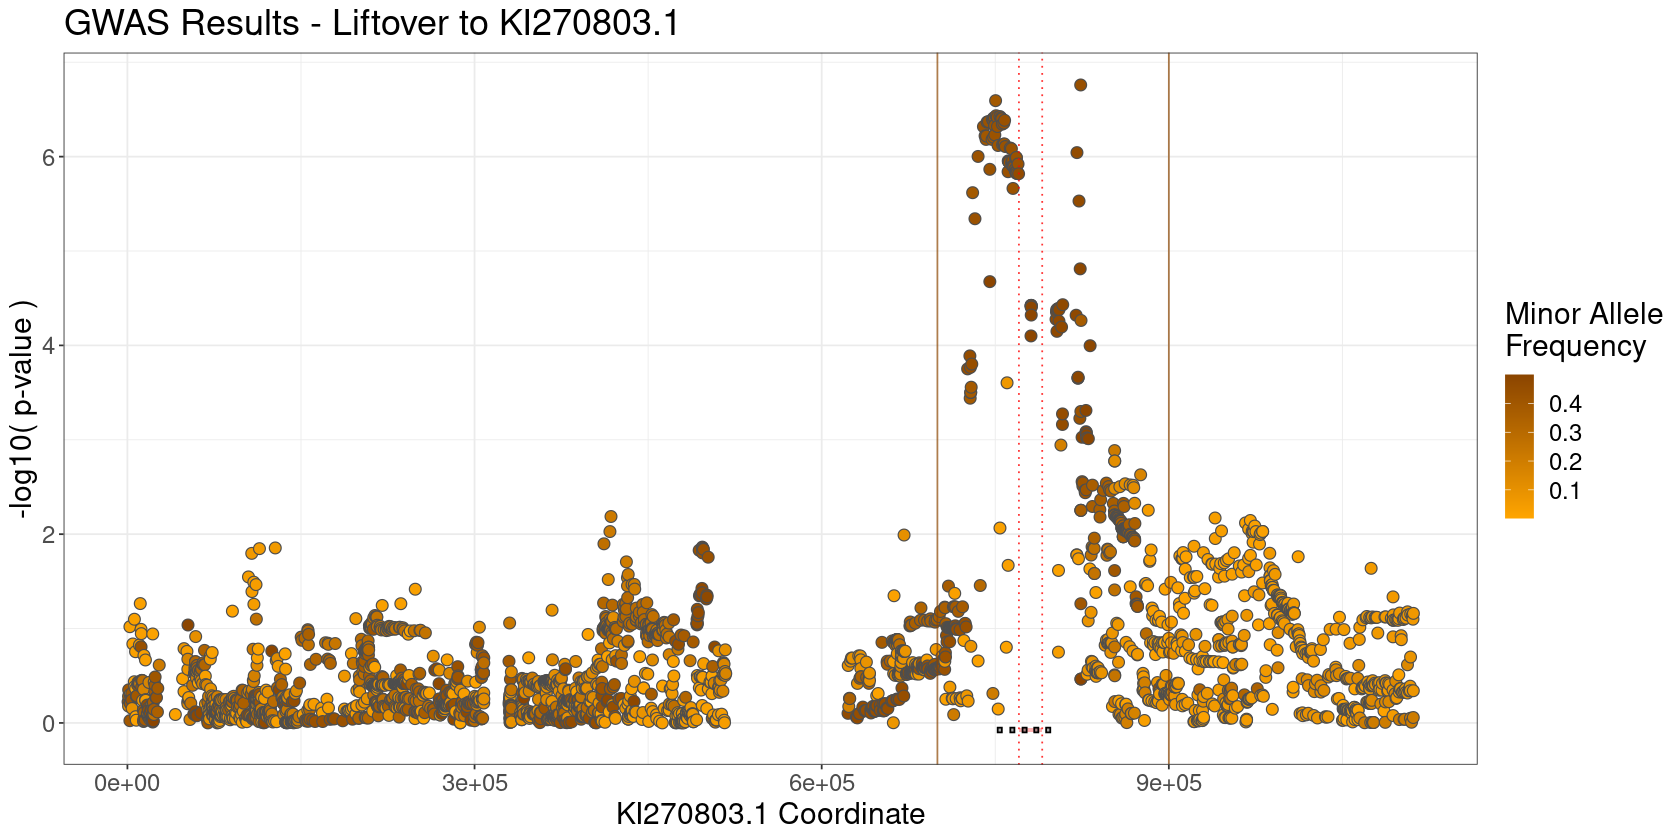

In [15]:
full.gwas.df$maf = pmin(full.gwas.df$af, 1-full.gwas.df$af)

p <- ggplot(full.gwas.df, aes(x=pos, y=-log10(p), fill=maf)) +
  geom_point(shape=21, size=3, color="grey30") +
  scale_fill_gradient(low = "orange1", high = "darkorange4", na.value = NA) +
  labs(fill = "Minor Allele\nFrequency") +
  geom_vline(xintercept = REGION_START, color="darkorange4", alpha=0.7) +
  geom_vline(xintercept = REGION_END, color="darkorange4", alpha=0.7) 
  #geom_point(data=gwas.df[gwas.df$pos %in% c(GWAS_TOP2,824553),], shape=24, size=4, fill="yellow")
p <- add_gene_rectangles(p, label=FALSE)
p <- add_theme(p, xlab="KI270803.1 Coordinate", ylab="-log10( p-value )", title="GWAS Results - Liftover to KI270803.1")

h=7 ; w=14
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("original_full_gwas.svg"), p, width=w, height=h)
p

GWAS results lifted over to alternative contig, no filtering applied

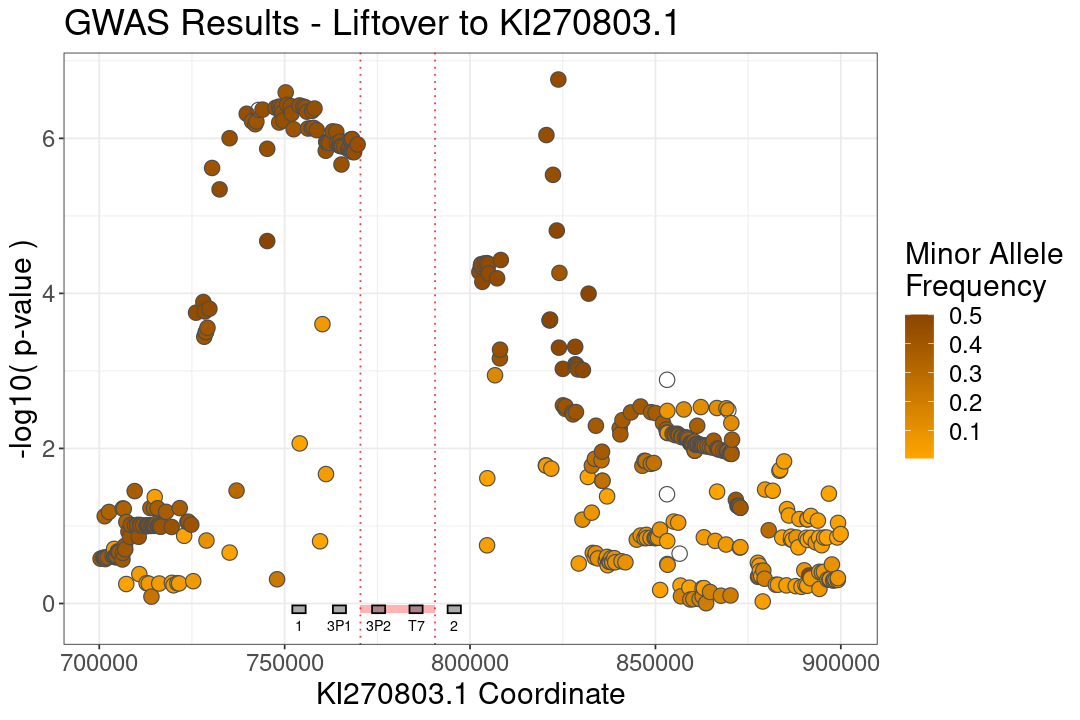

In [257]:
plot.df <- merge(gwas.df, variant.df, all.x=TRUE, by="pos")
p <- ggplot(plot.df, aes(x=pos, y=-log10(p), fill=maf)) +
  geom_point(shape=21, size=4, color="grey30") +
  scale_fill_gradient(low="orange1", high="darkorange4", na.value=NA) +
  labs(fill = "Minor Allele\nFrequency")
p <- add_gene_rectangles(p, short=TRUE, size=3, thick=0.15, vjust=1.2)
p <- add_theme(p, xlab="KI270803.1 Coordinate", ylab="-log10( p-value )",
              title="GWAS Results - Liftover to KI270803.1") 

h=6 ; w=9
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("orignal_gwas_locus.svg"), p, width=w, height=h)
p

GWAS results lifted over to alternative contig, filtered and fit to range.

### Re-imputed data using 10x as reference

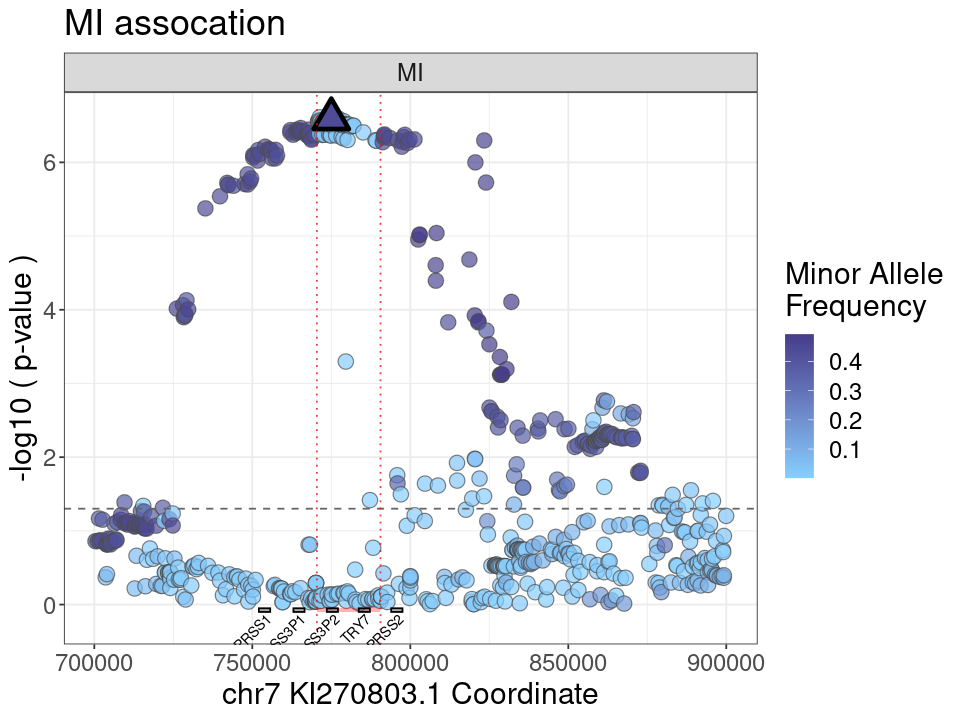

In [258]:
cov=c("sex", "platform", "cohort")
positions=array.variant.df[array.variant.df$maf > 0.001,]$pos

array.association.df <- mi_association(imputed.ds.matrix[positions,], array.df, cov)

array.association.df <- array.association.df[,1:7]
array.association.df <- merge(array.association.df, array.variant.df, by="pos", all.x=TRUE)
p<-plot_association(array.association.df, colourby="maf", colourlegend="Minor Allele\nFrequency", w=8, h=6,
                highlight=c(DEL_POS))

ggsave(out_name("reimputed_locus_association.svg"), p, width=8, height=6)
p

GWAS results imputed using 10x phased data (all cohorts).

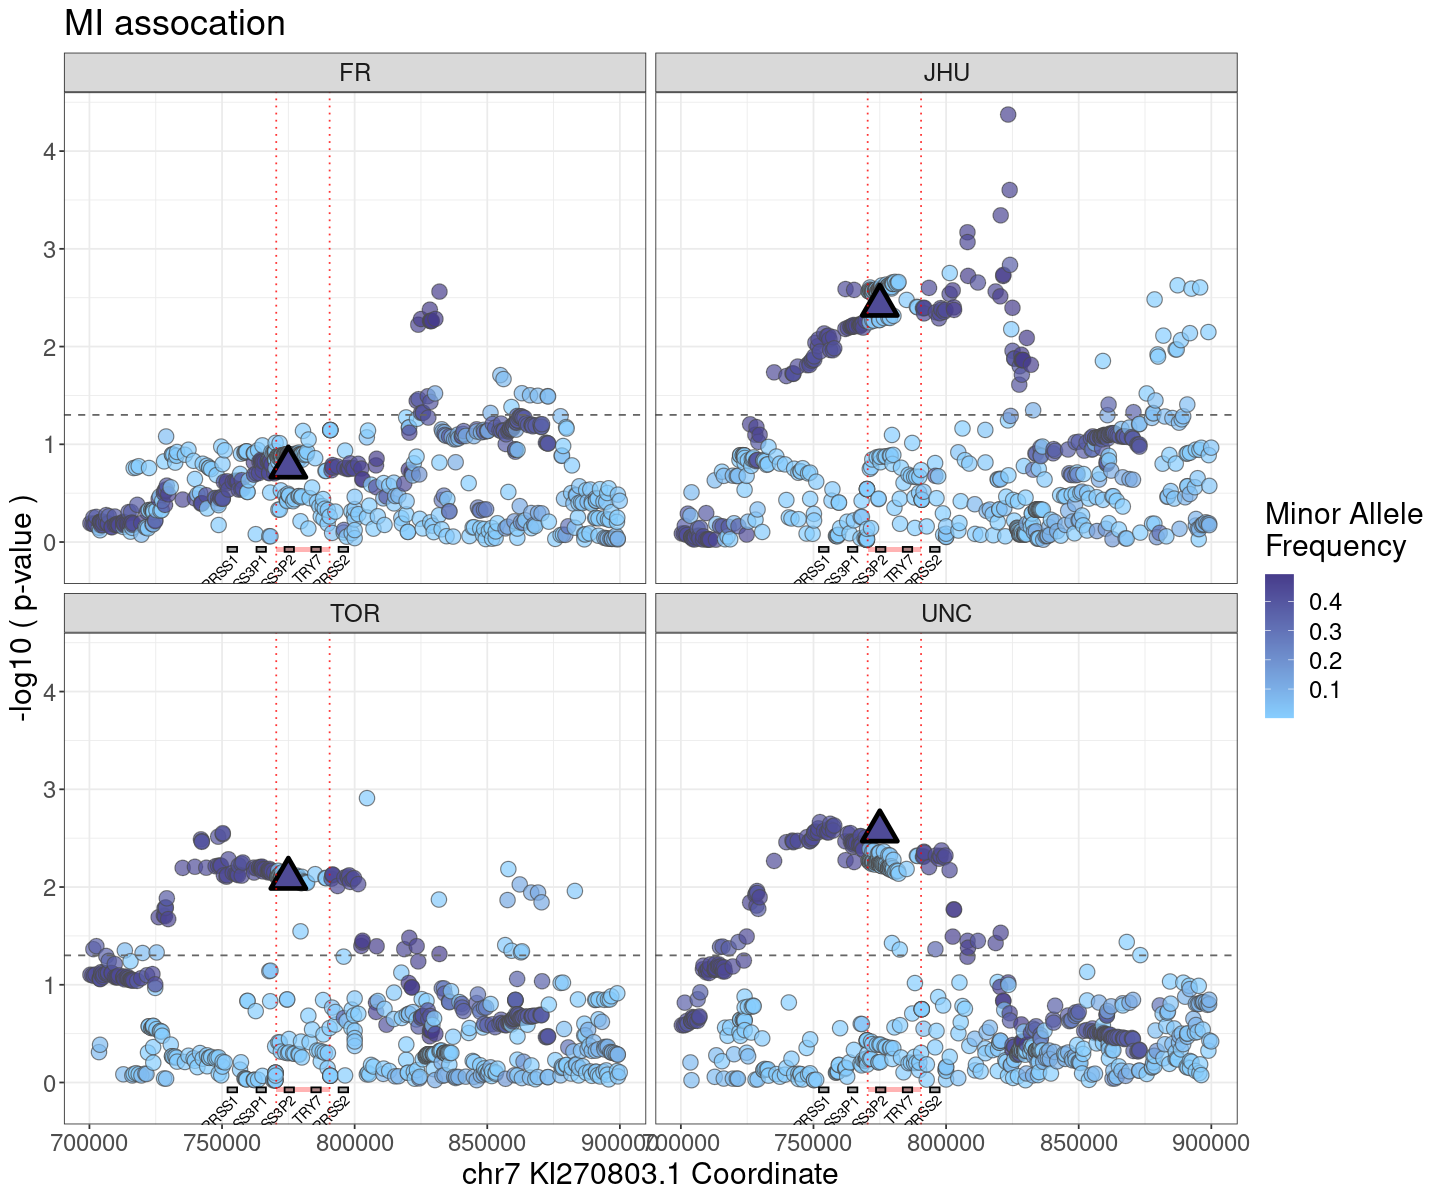

In [259]:
cov=c("sex", "platform", "cohort")
positions=array.variant.df[array.variant.df$maf > 0.001,]$pos

acdf <- mi_association(imputed.ds.matrix[positions,], array.df, splitby="cohort", covariates=cov)
acdf <- acdf[,1:7]
acdf <- merge(acdf, array.variant.df, by="pos", all.x=TRUE)
acdf<-acdf[acdf$p<0.95,]

p <- plot_association(acdf, colourby="maf", colourlegend="Minor Allele\nFrequency", highlight=c(DEL_POS))


ggsave(out_name("reimputed_locus_association_by_cohort.svg"), p, width=12, height=10)
p

GWAS results imputed using 10x phased data, split by cohort.

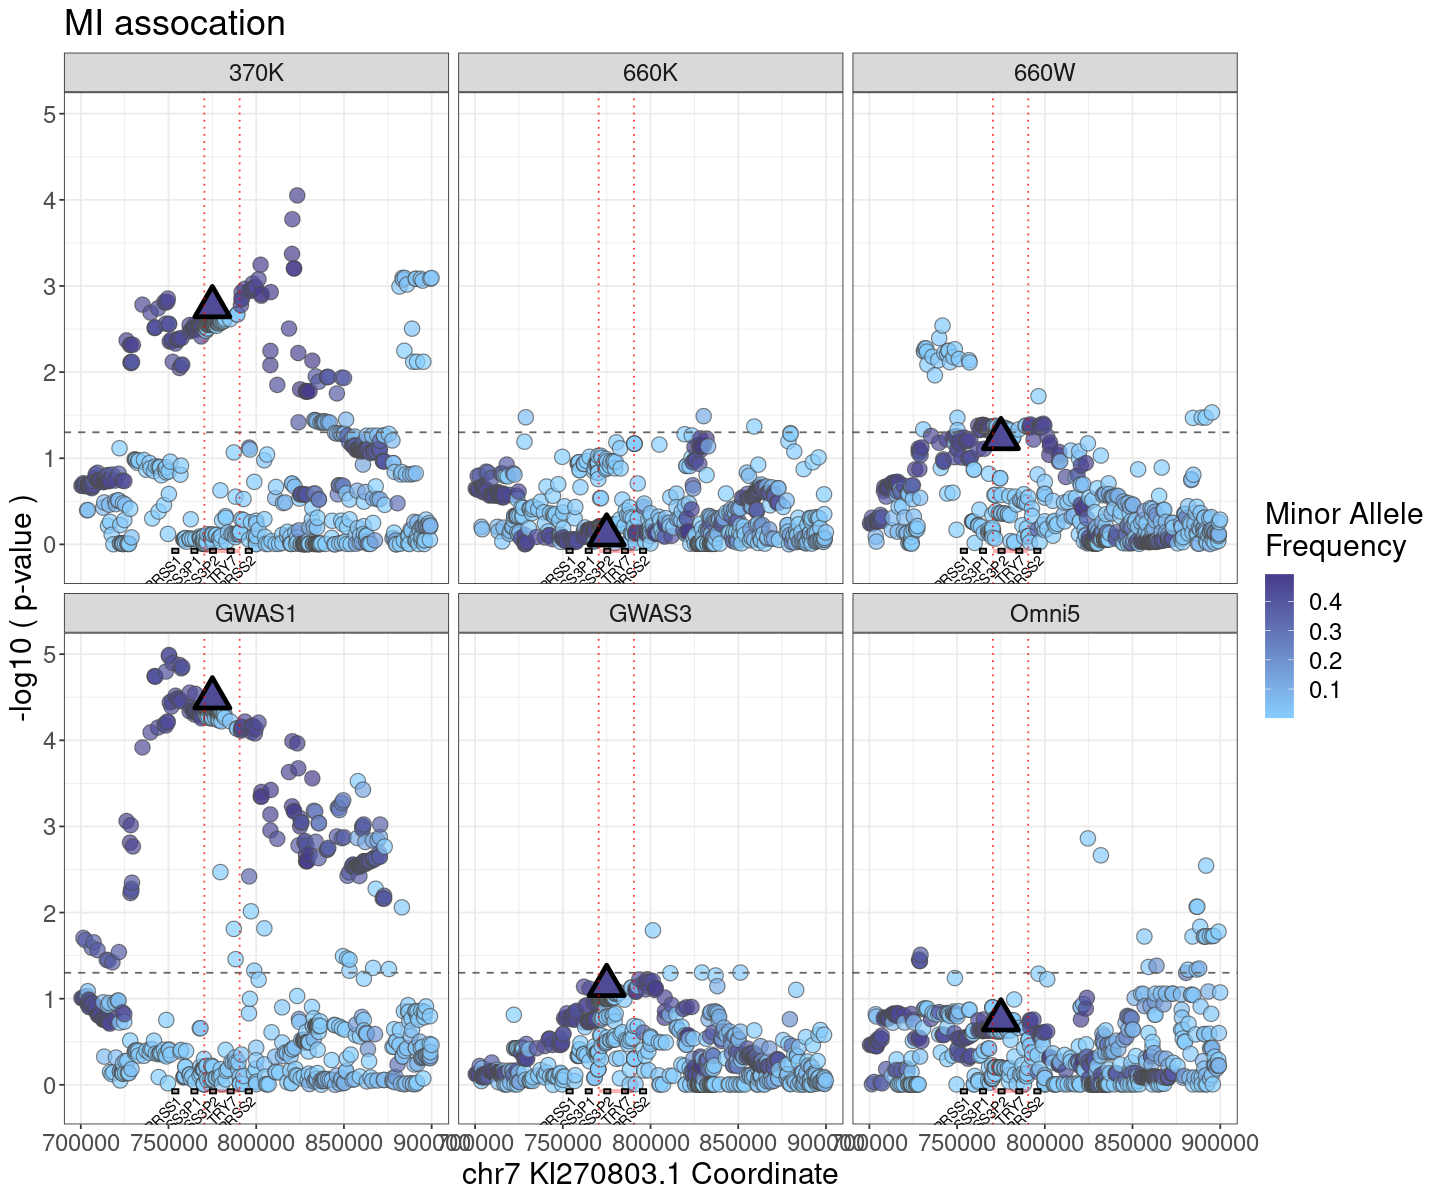

In [260]:
cov=c("sex", "platform", "cohort")

acdf <- mi_association(imputed.ds.matrix[positions,], array.df, splitby="platform", covariates=cov)
acdf <- acdf[,1:7]
acdf <- merge(acdf, array.variant.df, by="pos", all.x=TRUE)
#acdf<-acdf[acdf$p<0.95,]

p <- plot_association(acdf, colourby="maf", colourlegend="Minor Allele\nFrequency", highlight=c(DEL_POS))
ggsave(out_name("reimputed_locus_association_by_platform.svg"), p, width=12, height=10)
p

GWAS results imputed using 10x phased data, split by technology.

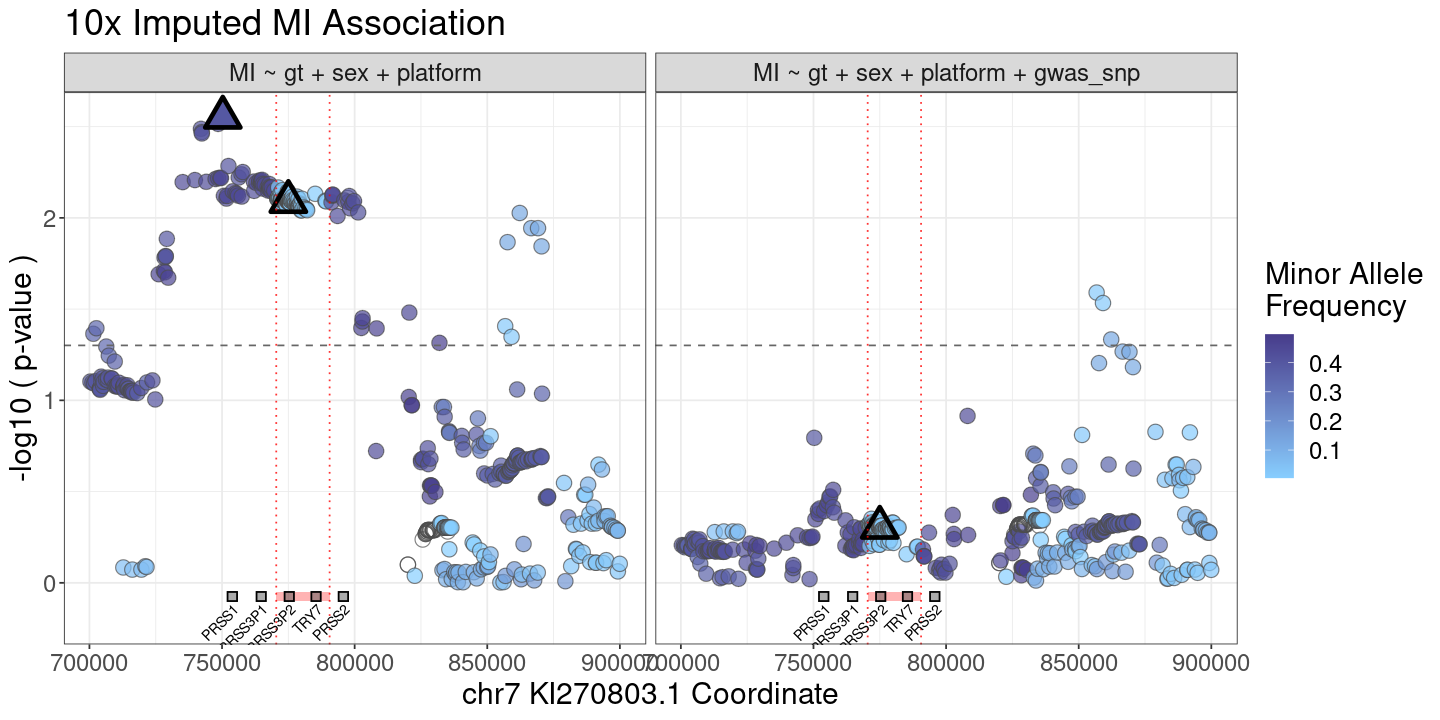

In [261]:
cov=c("sex", "platform")
#mat <- imputed.gt.matrix
mat <- imputed.ds.matrix

highqual <- quality.df[quality.df$platform == "gwas1" & quality.df$dr2 > 0.75,]$pos
highqual <- c(highqual, DEL_POS)

positions=array.variant.df[array.variant.df$maf > 0.001 & array.variant.df$pos %in% highqual,]$pos
subset.df <- array.df[array.df$cohort=="TOR",]

acdf <- mi_association(mat[positions,], subset.df, gt.cov=c(), covariates=cov)
acdf <- acdf[,1:7]
acdf <- acdf[, colnames(acdf) != "mac"]
acdf <- merge(acdf, variant.df, by="pos", all.x=TRUE)
acdf$group <- "MI ~ gt + sex + platform"

acdf2 <- mi_association(mat[positions,], subset.df, gt.cov=c(GWAS_TOP), covariates=cov)
acdf2 <- acdf2[,1:7]
acdf2 <- acdf2[, colnames(acdf2) != "mac"]
acdf2 <- merge(acdf2, variant.df, by="pos", all.x=TRUE)
acdf2$group <- "MI ~ gt + sex + platform + gwas_snp"

ADJUSTED_TOP <- acdf2[acdf2$var=="gt" & acdf2$p < 0.05,]$pos

acdf <- rbind(acdf, acdf2)
p <- plot_association(acdf, colourby="maf", colourlegend="Minor Allele\nFrequency", 
                      highlight=c(DEL_POS, GWAS_TOP), h=6, w=12, title="10x Imputed MI Association")
ggsave(out_name("reimputed_toronto_conditional.svg"), p, width=6, height=12)
p

GWAS results imputed using 10x phased data for TOR cohort.

Left: MI ~ gt + sex + platform

Right: MI ~ gt + sex + platform + top_gwas_snp

### Accuracy of Imputation


 370K  660K  660W GWAS1 GWAS3 Omni5 
    0     0   278  1529     0    60 

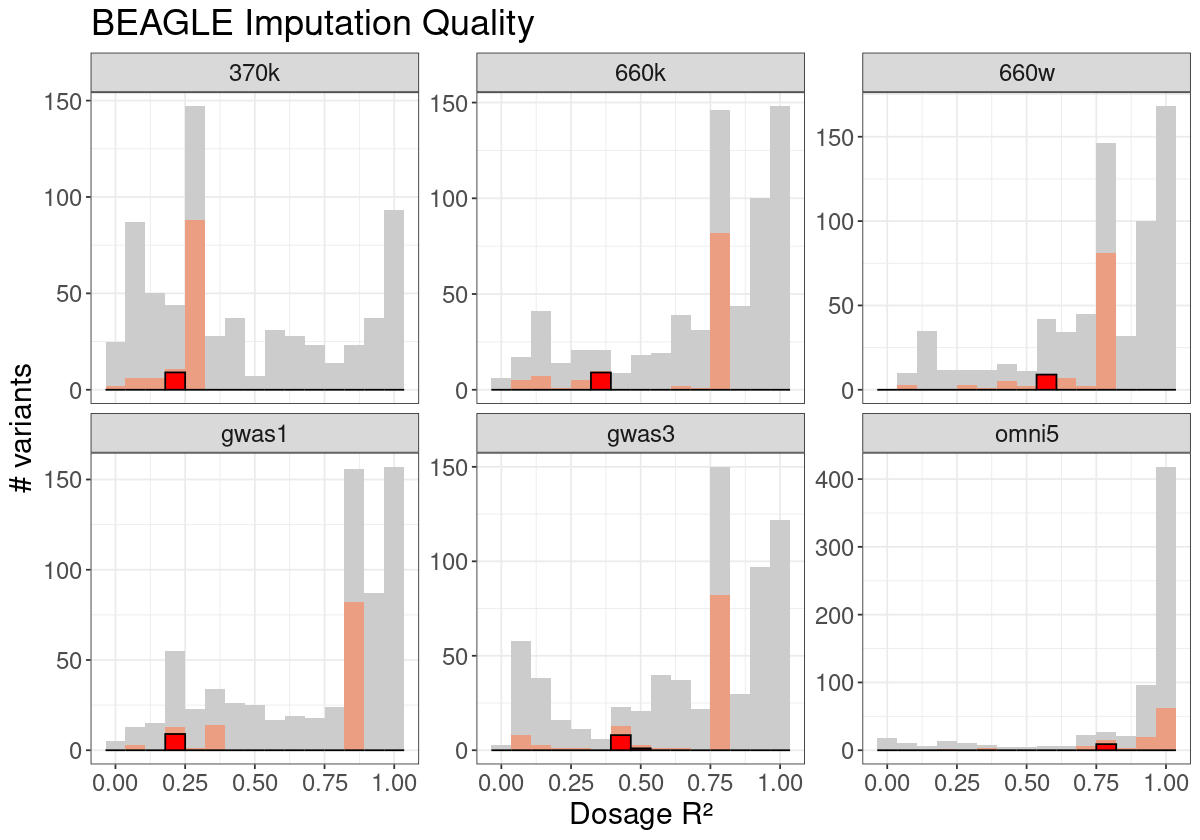

In [285]:
bin=15

qdf=quality.df[quality.df$pos %in% array.variant.df[array.variant.df$maf > 0.001,]$pos,]

qdf.del <- qdf[!is.na(qdf$dr2.del),]
qdf.important <- qdf[qdf$pos %in% A0,]

options(warn=-1)
p <- ggplot(qdf, aes(dr2))+
    geom_histogram(bins=bin, fill="grey80") + facet_wrap(~platform, scales="free_y") +
    geom_histogram(data=qdf.del, aes(dr2), bins=bin, alpha=0.6, fill="coral") +
    geom_histogram(data=qdf.important, aes(dr2), bins=bin, alpha=1, colour="black", fill="red")
p <- add_theme(p, "Dosage R²", "# variants", "BEAGLE Imputation Quality")

w=10 ; h=7
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("imputation_quality_hist2.svg"), p, width=w, height=h)
p
options(warn=0)

table(array.df[array.df$cohort=="TOR",]$platform)


 370K  660K  660W GWAS1 GWAS3 Omni5 
    0     0    22    45     0     1 

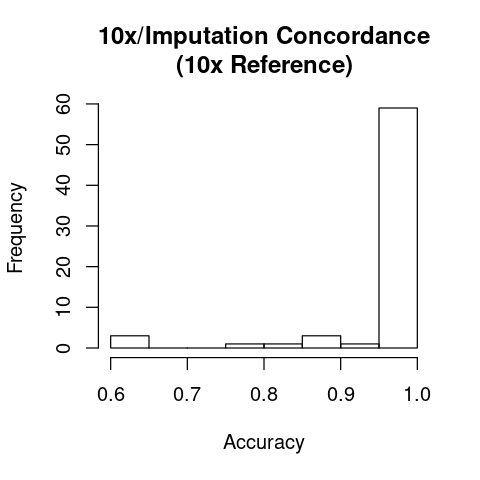

In [269]:
overlap.df <- overlap.df[overlap.df$array.id != "DEN0218",]
get_accuracy <- function(array.sample, m2){
    positions <- intersect(rownames(gt.matrix), rownames(m2))
    
    seq.sample <- overlap.df[overlap.df$array.id == array.sample,]$seq.id
    
    g1 <- m2[rownames(m2) %in% positions, colnames(m2) == array.sample]
    g2 <- gt.matrix[rownames(gt.matrix) %in% positions,
                    colnames(gt.matrix) == seq.sample]

    #return(cor(g1, g2, use="complete.obs"))
    filt=is.na(g1) | is.na(g2)
    return(sum(g1[!filt]==g2[!filt])/length(g1[!filt]))
    
}
table(array.df[array.df$sample %in% overlap.df$array.id,]$platform)

accuracy.df1 <- data.frame(array.sample=overlap.df$array.id, array.sample=overlap.df$seq.id,
           accuracy=sapply(overlap.df$array.id, get_accuracy, m2=imputed.gt.matrix))
#head(accuracy.df1[order(accuracy.df1$accuracy),],10)
options(repr.plot.width=4, repr.plot.height=4)
hist(accuracy.df1$accuracy, xlab="Accuracy", main="10x/Imputation Concordance\n(10x Reference)" )

accuracy.df2 <- data.frame(array.sample=overlap.df$array.id,
           array.sample=overlap.df$seq.id,
           accuracy=sapply(overlap.df$array.id, get_accuracy, m2=array.matrix))

#head(accuracy.df[order(accuracy.df$accuracy),],10)
options(repr.plot.width=4, repr.plot.height=4)
#hist(accuracy.df2$accuracy, xlab="Accuracy", main="10x/Imputation Concordance\n(1kgenome + 101cf Reference)" )
df <- merge(accuracy.df1, accuracy.df2, by="array.sample.1")
#plot(df$accuracy.x, df$accuracy.y, xlab="Accuracy\n(1kgenome + 101cf reference)", 
#     ylab="Accuracy (10x reference)")

---
# GTEX DATA

[1] 157
[1] 134


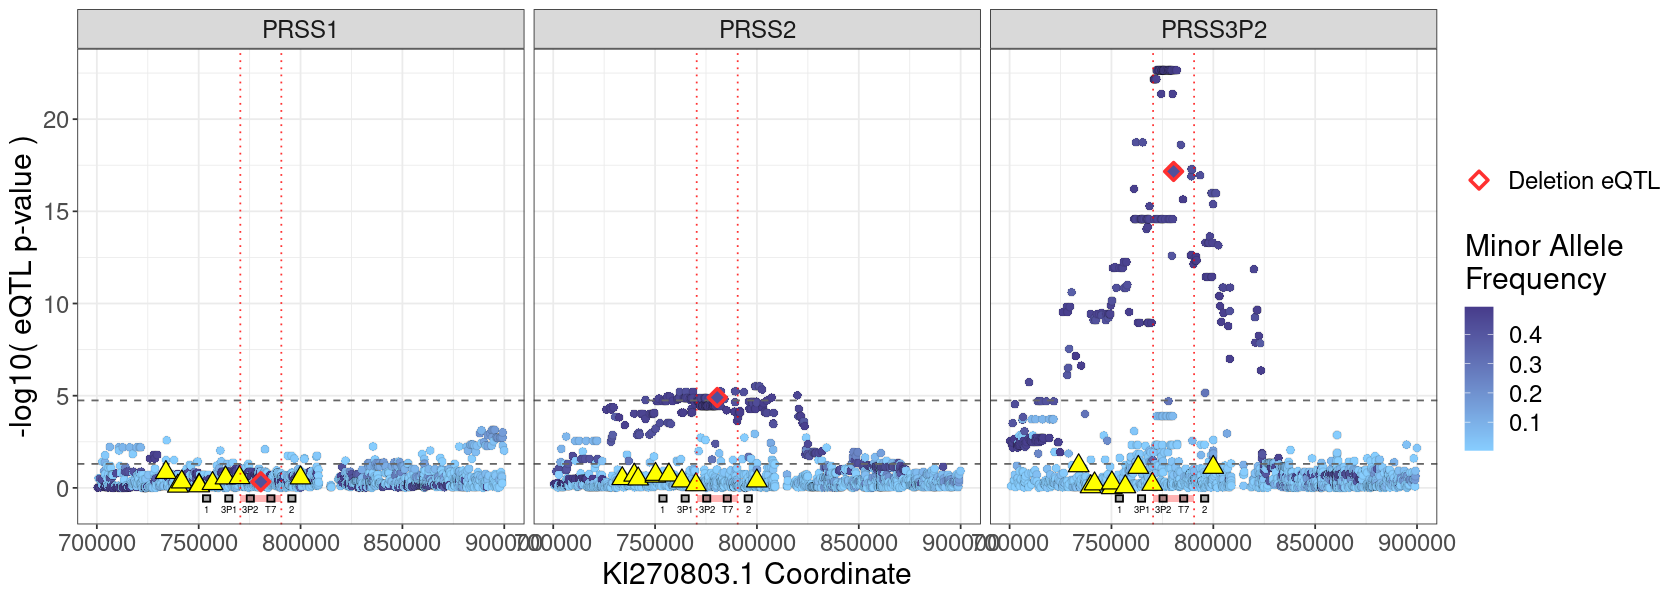

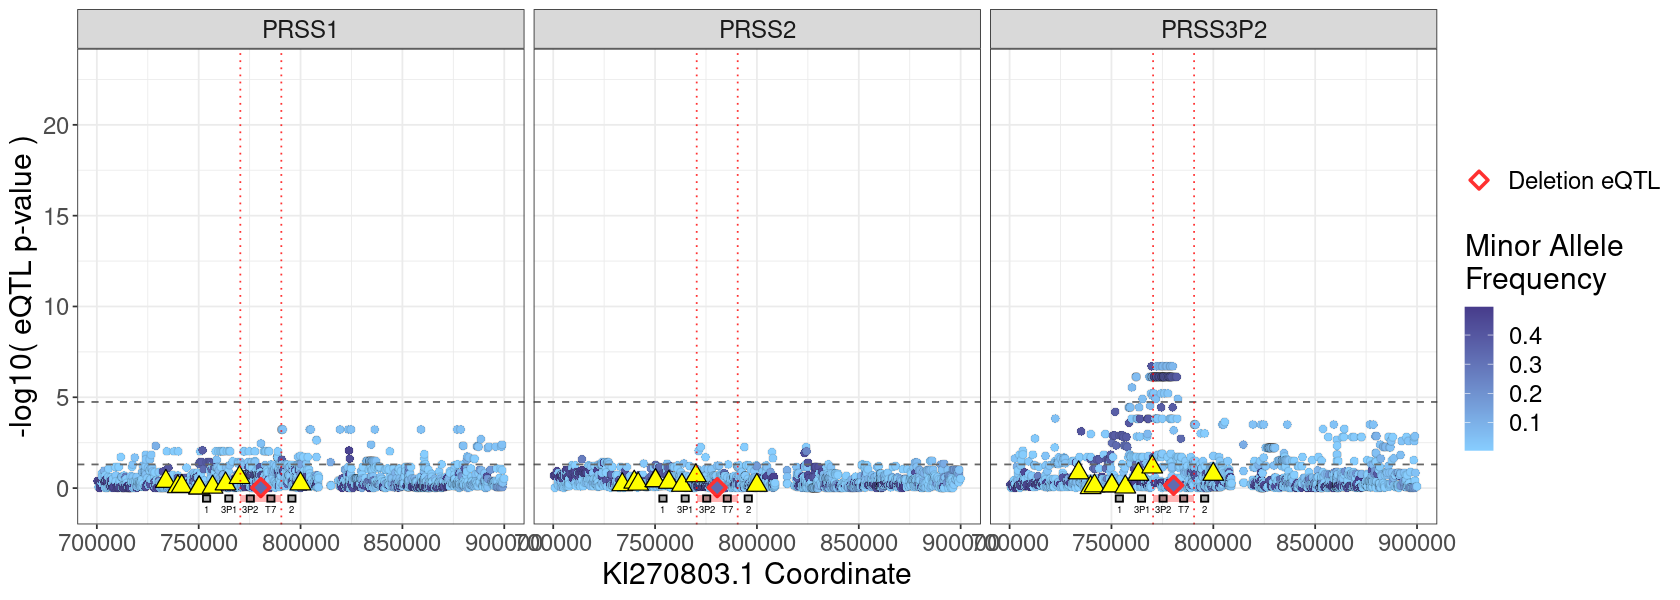

In [270]:
source("function_helper.R")
print(length(unique(gtex.expression.df$sample)))
plot_eqtl(pair.df, thick=0.4, correction=2766, plotname="eqtl_genes.svg", ymax=5, highlight=c(FINEMAP))

print(length(unique(gtex.expression.df[! is.na(gtex.expression.df$nohom_expression),]$sample)))
plot_eqtl(pair.nohom.df, thick=0.4, correction=2766, plotname="eqtl_genes_nohom.svg", ymax=23, highlight=c(FINEMAP))

Association between KI270803.1 variants and gene expression using eQTL analysis. Circles denote variants plotted with respect to their genomic coordinates and eQTL significance. Circles are colored by their minor allele frequency. Each subplot displays the gene for which the eQTL analysis was calculated. Trypsin genes are depicted as rectangles, vertical dotted lines show the position of the deletion polymorphism. The eQTL for the deletion allele is highlighted by a red diamond. Horizontal dashed lines show the threshold for p=0.05 as well as the Bonferroni correction for 2766 variants.

The top three plots show the eQTL results for 157 GTEx pancreas samples. The bottom three plots show results for 134 individuals that are not homozygous for the deletion polymorphism. Additionally, the model used during eQTL analysis included the deletion status as a covariate.


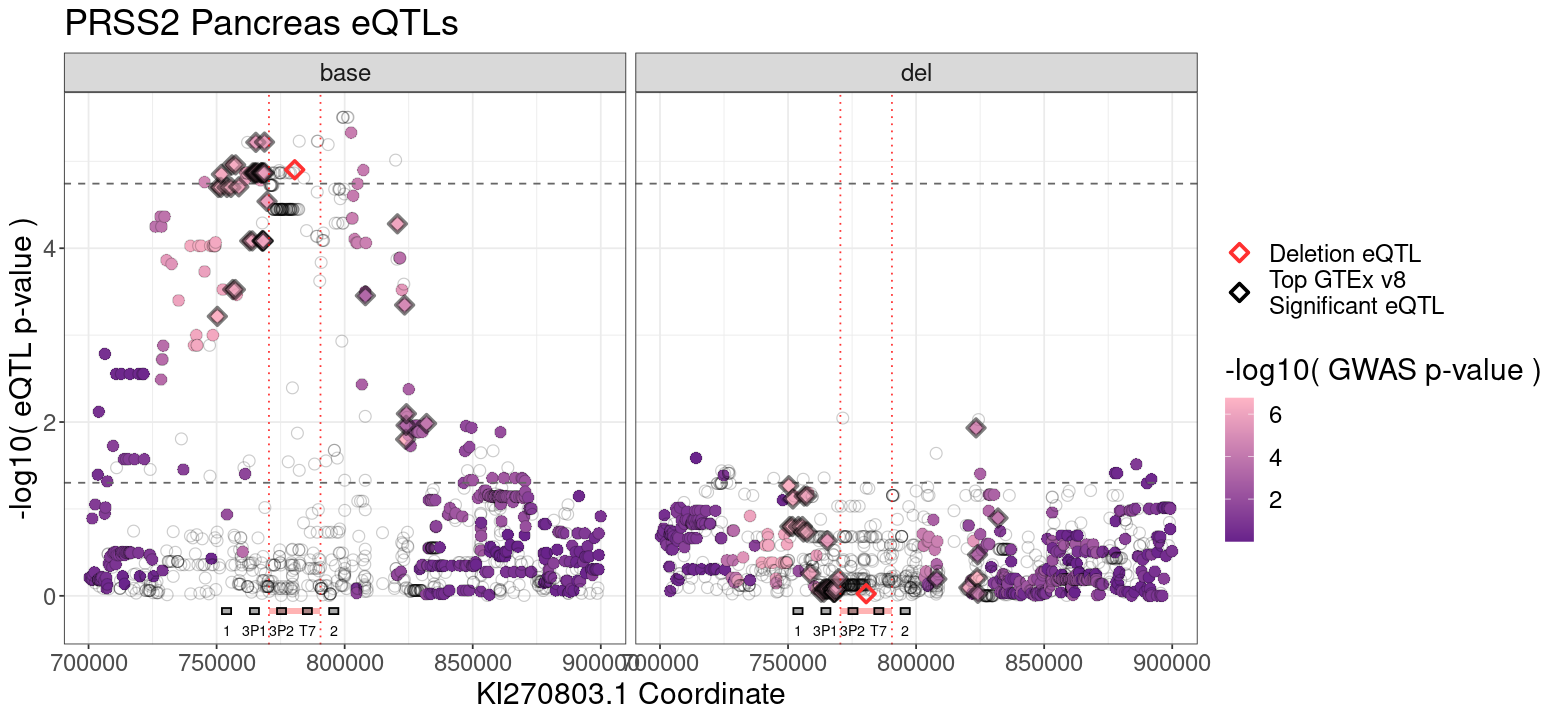

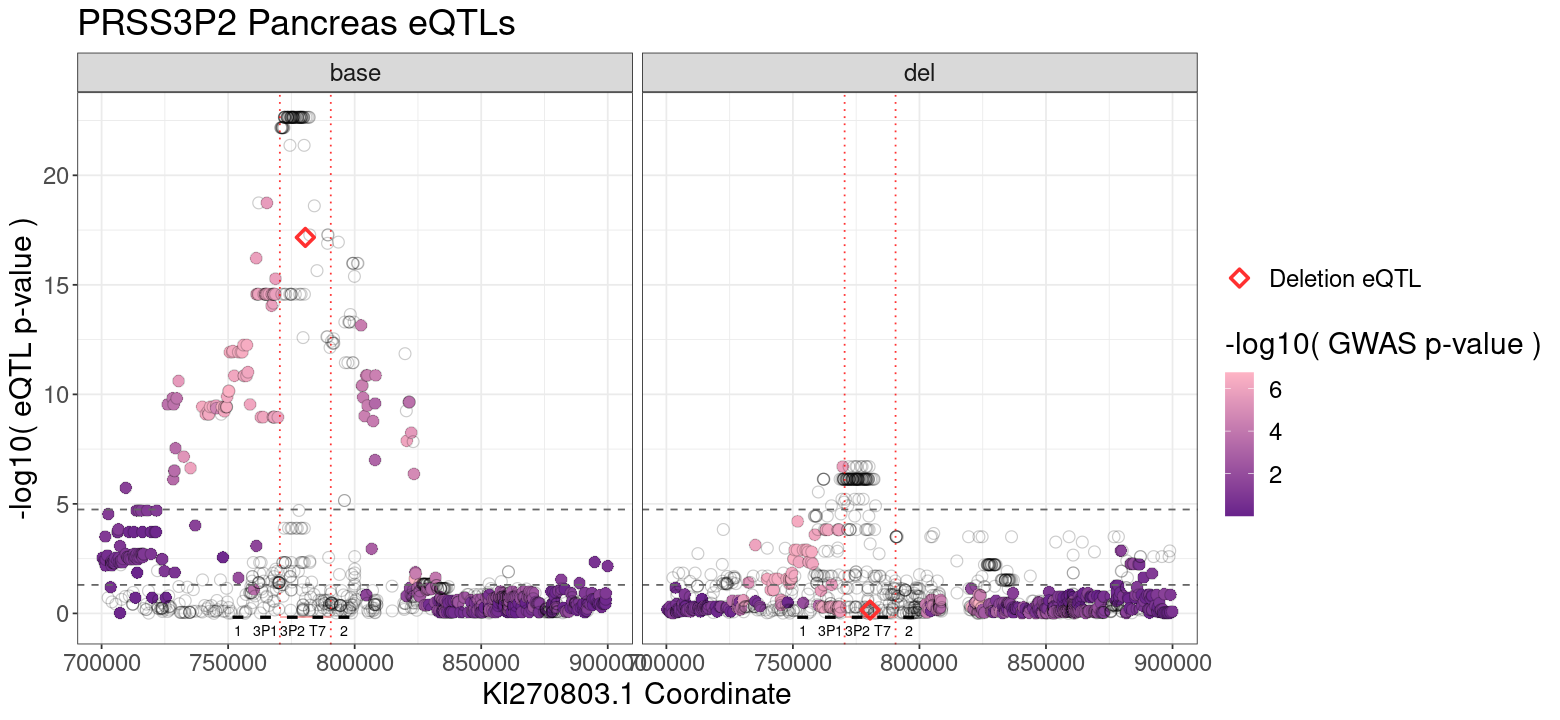

In [293]:
v8 <- pair.v8.df [,c("pos","gene","pval_nominal")]
colnames(v8) <- c("pos.38", "gene.v8", "p.v8")
eqtl.df <- merge(gwas.df, v8, all.x=TRUE, by="pos.38")

rnaseq.samp <- unique(gtex.expression.df$sample)
rnaseq.samp <- sapply(rnaseq.samp, str_replace, "-", "\\.")

#pair.df[pair.df$variant_id == "DEL",]
pdf <- merge(pair.df, eqtl.df, all.x=TRUE, by="pos")
ddf <- merge(pair.nohom.df, eqtl.df, all.x=TRUE, by="pos")

pdf <- pdf[!is.na(pdf$maf) & pdf$maf > 0.01,]
ddf <- ddf[!is.na(ddf$maf) & ddf$maf > 0.01,]

options(warn=-1)
#pdf <- merge(pair.df, association.df, all.x=TRUE, by="pos")
#df[pdf$pos %in% c(GWAS_TOP2),]$pos.38
draw_coloc(pdf[pdf$gene == "PRSS2",], "prss2_gwas_gtex_coloc.svg", 
           del.df=ddf[ddf$gene == "PRSS2",], title="PRSS2 Pancreas eQTLs", w=13)
draw_coloc(pdf[pdf$gene == "PRSS3P2",], "prss3p2_gwas_gtex_coloc.svg", show_gtex=FALSE,
           del.df=ddf[ddf$gene == "PRSS3P2",], title="PRSS3P2 Pancreas eQTLs", w=13)
options(warn=0)


#SIG_POS <- ddf[ddf$gene == "PRSS3P2" & ddf$pval_nominal < 1e-6,]$pos

Colocalization of results with respect to PRSS2 in the pancreas. Circles denote variants plotted with respect to their genomic coordinates and PRSS2 eQTL significance. Circles are colored by the significance of association to MI as observed in previous GWAS work. Variants not observed in the GWAS study are shown without color. Trypsin genes are depicted as rectangles, vertical dotted lines show the position of the deletion polymorphism. The horizontal dashed lines show the threshold for p=0.05 as well as the Bonferroni correction for 2766 variants. 18 variants classified as significant pancreas PRSS2 eQTLs by GTEx v8 (aligned to HG38) are highlighted with black diamonds.

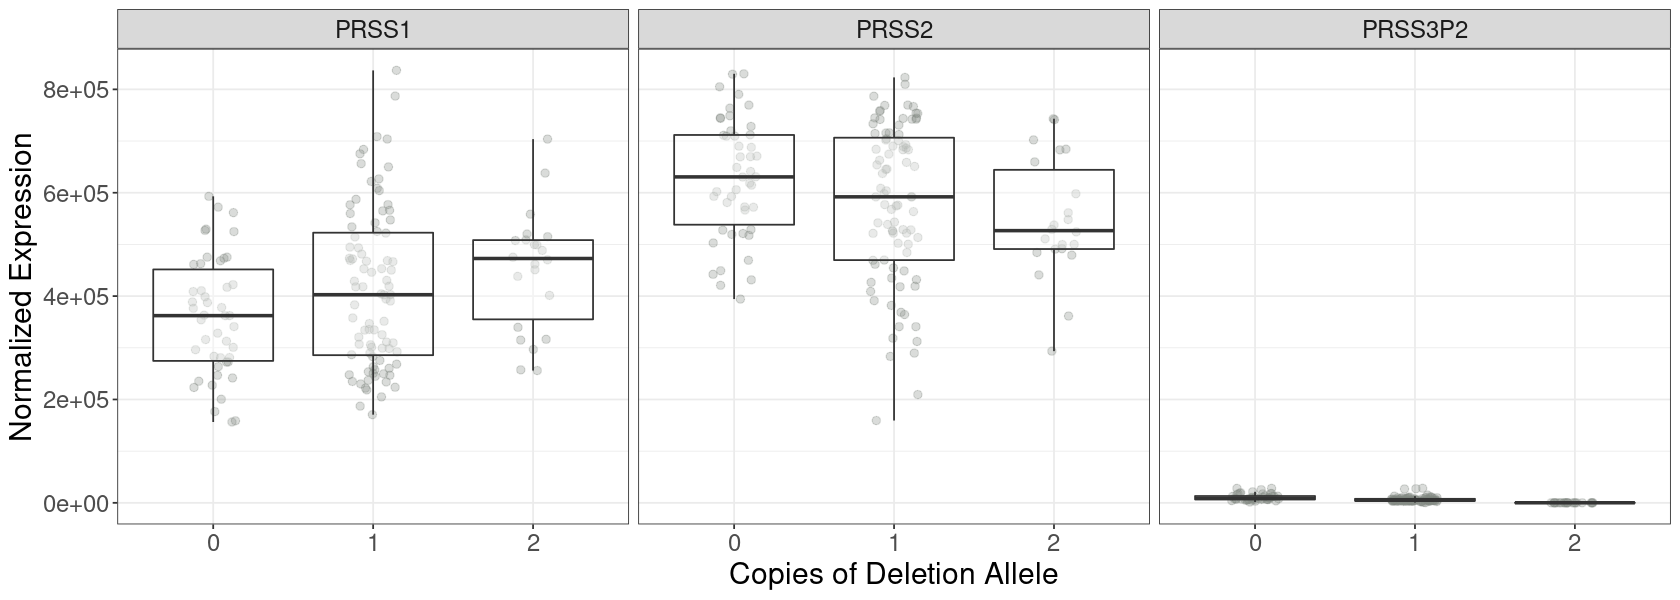

In [238]:
target.pos <- DEL_POS
gt <- gtex.matrix[rownames(gtex.matrix) == target.pos,]
plot.df <- data.frame(gt=gt, sample=colnames(gtex.matrix))
plot.df <- merge(plot.df, gtex.expression.df, all.x=TRUE, by="sample")

plot.df <- plot.df[plot.df$gene %in% c(EXPRESSED) & ! is.na(plot.df$gt),]
plot.df$gt <- factor(plot.df$gt)

p <- ggplot(plot.df, aes(x=gt, y=tpm, group=gt)) + 
     geom_point(size=2, alpha=0.3, colour="honeydew4", position=position_jitter(height=0, width=0.15)) +
     geom_boxplot(outlier.alpha=0, alpha=0.4) + facet_wrap(~gene)
p <- add_theme(p, xlab="Copies of Deletion Allele", ylab="Normalized Expression")

w=14 ; h=5
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("expression_by_deletion.svg"), p, width=w, height=h)
p

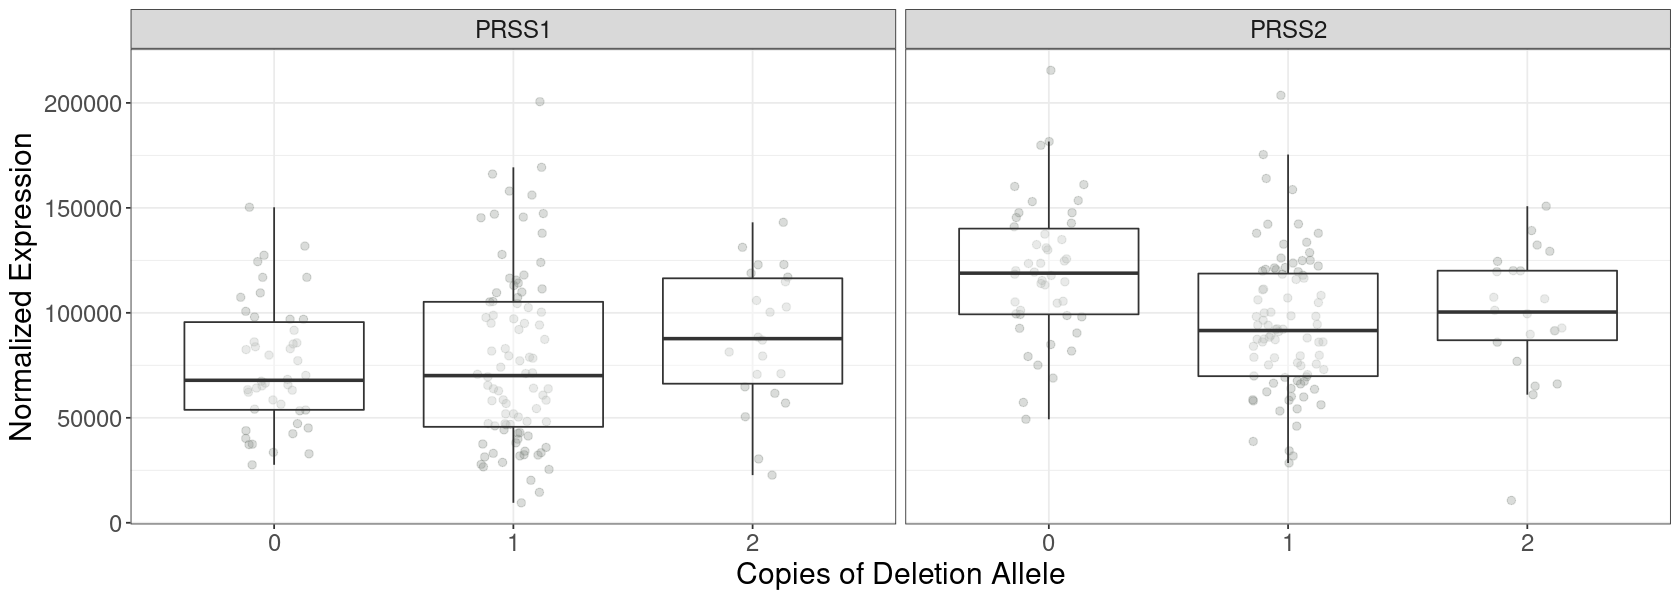

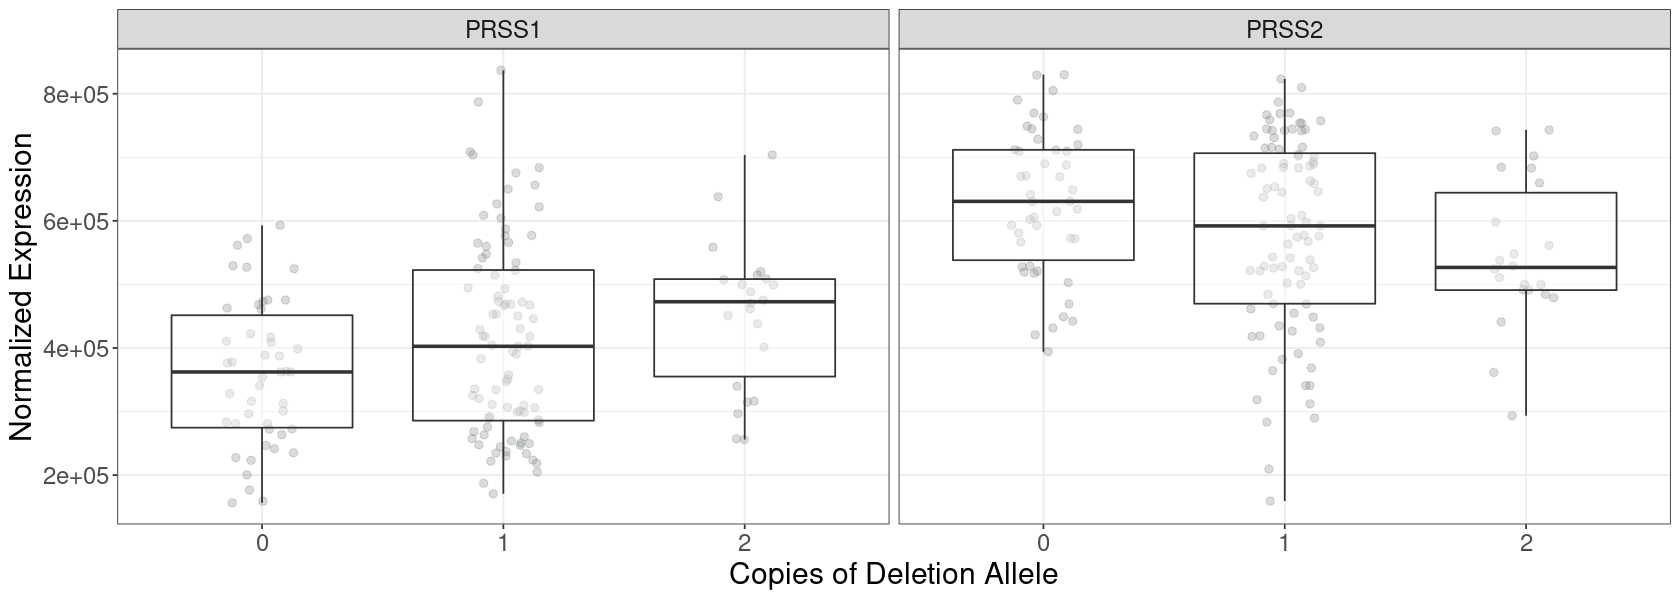

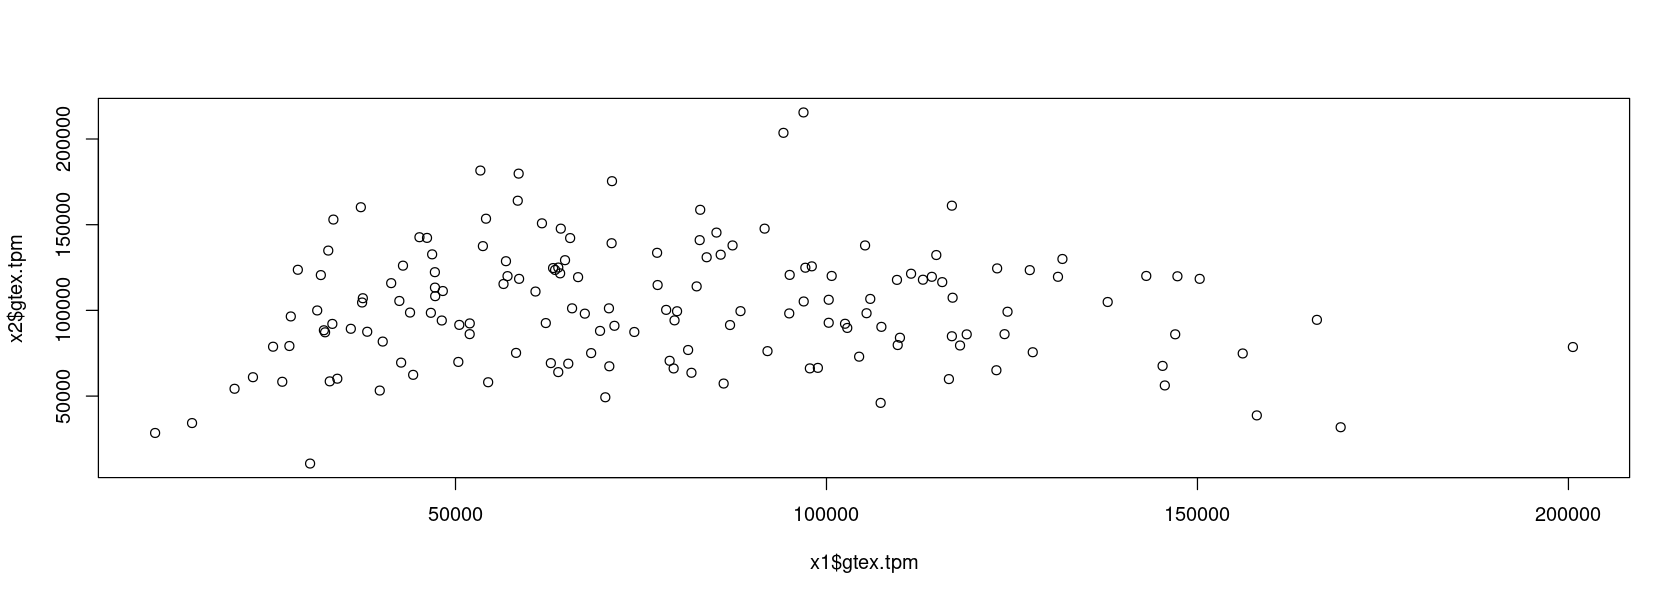

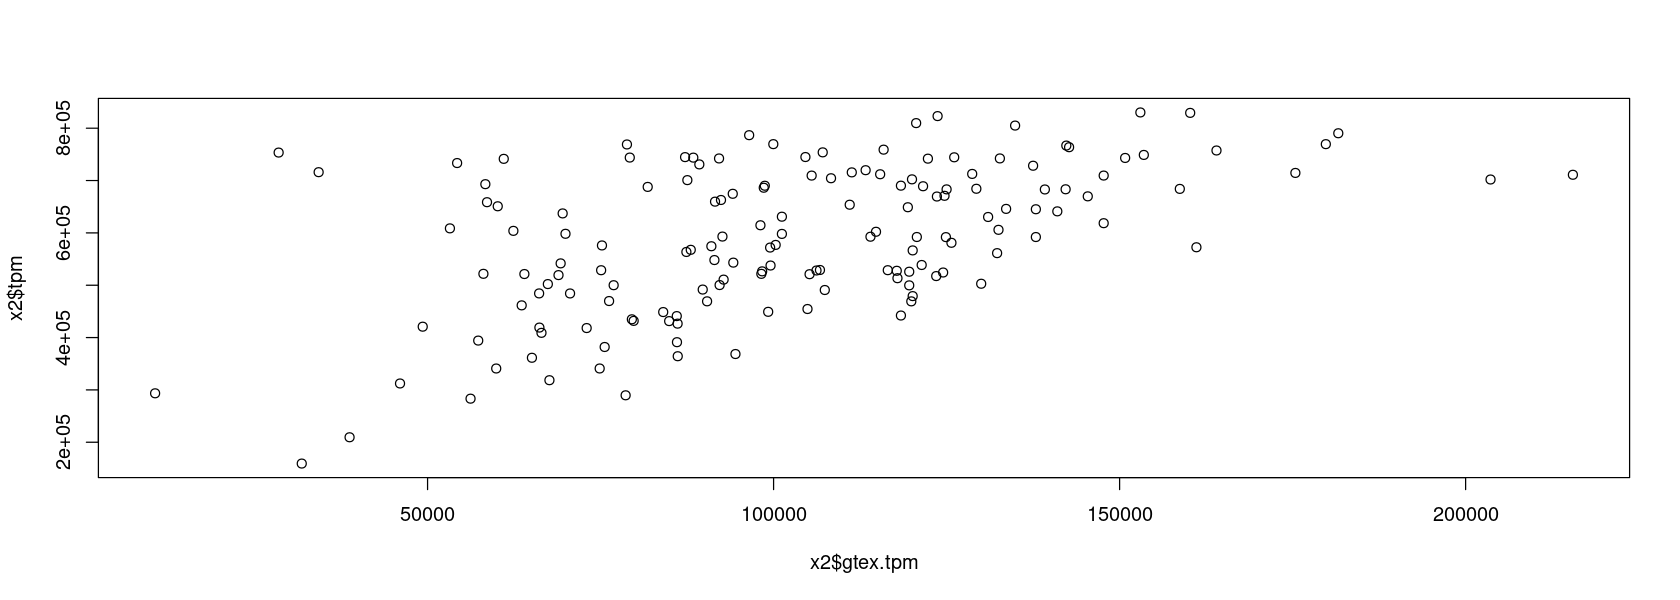

In [252]:
#source("read_helper.R")
#load_gtex_pancreas()

plot.df.gtex <- merge(plot.df, pancreas.v8.df, all.x=TRUE, by=c("sample", "gene"), no.dups=FALSE)
plot.df.gtex <- plot.df.gtex[!is.na(plot.df.gtex$gtex.tpm),]

p <- ggplot(plot.df.gtex, aes(x=gt, y=gtex.tpm, group=gt)) + 
     geom_point(size=2, alpha=0.3, colour="honeydew4", position=position_jitter(height=0, width=0.15)) +
     geom_boxplot(outlier.alpha=0, alpha=0.4) + facet_wrap(~gene)
p <- add_theme(p, xlab="Copies of Deletion Allele", ylab="Normalized Expression")

p

p <- ggplot(plot.df[plot.df$gene %in% c("PRSS1", "PRSS2", "PRSS3P1"),], aes(x=gt, y=tpm, group=gt)) + 
     geom_point(size=2, alpha=0.3, colour="honeydew4", position=position_jitter(height=0, width=0.15)) +
     geom_boxplot(outlier.alpha=0, alpha=0.4) + facet_wrap(~gene)
p <- add_theme(p, xlab="Copies of Deletion Allele", ylab="Normalized Expression")


p
x1 <- plot.df.gtex[plot.df.gtex$gene == "PRSS1",]
x2 <- plot.df.gtex[plot.df.gtex$gene == "PRSS2",]
plot(x1$gtex.tpm, x2$gtex.tpm)

plot(x2$gtex.tpm, x2$tpm)


### GTEX Imputed Data

[1] 0.9697842

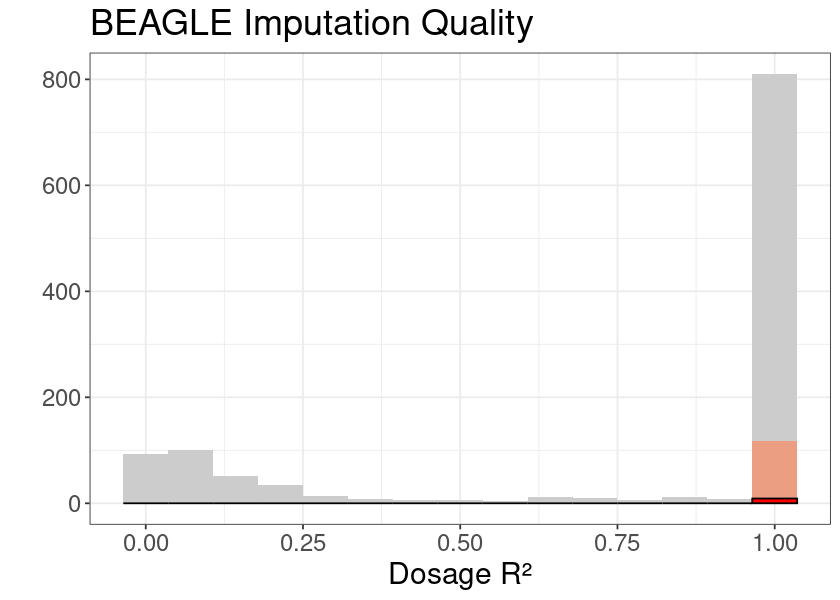

In [292]:
bin=15

qdf <- gtex.quality.df
qdf$maf <- pmin(qdf$af, 1-qdf$af)
qdf <- qdf[qdf$maf > 0.01,]
mean(qdf$dr2 >= 1)

qdf.del <- qdf[!is.na(qdf$dr2.del),]
qdf.important <- qdf[qdf$pos %in% A0,]

#options(warn=-1)
p <- ggplot(gtex.quality.df, aes(dr2)) + geom_histogram(bins=bin) +
    geom_histogram(bins=bin, fill="grey80") + 
    geom_histogram(data=qdf.del, aes(dr2), bins=bin, alpha=0.6, fill="coral") +
    geom_histogram(data=qdf.important, aes(dr2), bins=bin, alpha=1, colour="black", fill="red")

p <- add_theme(p, "Dosage R²", "", "BEAGLE Imputation Quality")

w=7 ; h=5
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("imputation_quality_hist.svg"), p, width=w, height=h)
p
options(warn=0)

Imputation quality of 10x data onto GTEx data.

---
# Analysis - CLUSTERING DELETION

### IMPUTE MISSING

In [294]:
#NOTE: this step takes some time to complete
k=4
imputed.hap.mat <- hap.matrix

#replace variants on deleted haps with -1
pos <- rownames(hap.matrix)
imputed.hap.mat[pos >= GAP_START & pos <= GAP_END, del.status==1 ] <- -1
imputed.hap.mat <- as.matrix(kNN(imputed.hap.mat, k=k, imp_var=FALSE))
rownames(imputed.hap.mat) <- rownames(hap.matrix)

### CLUSTER HAPLOTYPES

In [295]:
kmeans_cluster_haplotypes <- function(imputed.mat, k, seed=428){ 
    set.seed(seed)

    imputed.mat <- t(imputed.mat)
    imputed.mat <- imputed.mat[, colVars(imputed.mat) > 0]

    means <- kmeans(imputed.mat, centers=k, nstart=25)
    hap.df <- data.frame(sample=rownames(imputed.mat), cluster=means$cluster)
    cluster.df <- data.frame(sample=sapply(as.character(hap.df$sample), FUN=split_id))

    #collapse cluster haplotypes for each individual 
    get_cluster <- function(samp, i){
        clust <- hap.df[hap.df$sample == paste(samp, i, sep="."),]$cluster
        if (length(clust) == 0){ return (NA) }
        return(clust)
    }

    cluster.df$cluster.1 <- sapply(cluster.df$sample, FUN=get_cluster, i=1)
    cluster.df$cluster.2 <- sapply(cluster.df$sample, FUN=get_cluster, i=2)
    return(list(clusters=means, df=cluster.df, hap.df=hap.df, mat=imputed.mat))
}

[1] 1174


  A   B   C   D 
622  28  22 502 

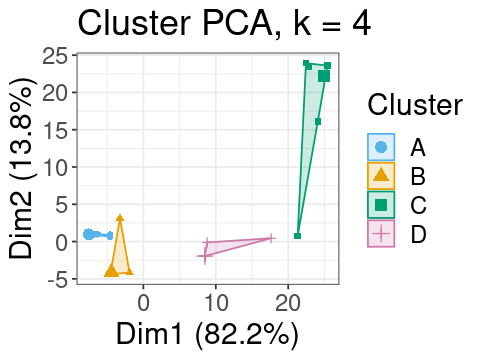

In [296]:
POS <- intersect(intersect(SIG_POS, rownames(imputed.hap.mat)), rownames(imputed.gtex.hap.matrix))

mat <- imputed.hap.mat[rownames(imputed.hap.mat) %in% c(POS),]
mat <- cbind(mat, imputed.gtex.hap.matrix[rownames(imputed.gtex.hap.matrix) %in% c(POS),])

ncol(mat)

mat[is.na(mat) | mat< 0] <- 0.5

k=4
clusters <- kmeans_cluster_haplotypes(mat, k)

#label clusters
rep <- c("QUL28163_03A.1", "OSK7719_03A.1", "BSP21041_03A.2", "OSK7706_03A.1")
labels <- "ABCDE"
clusters <- label_clusters(clusters, rep, labels)
table(clusters$hap.df$cluster)

p <- fviz_cluster(clusters$clusters, geom = "point", data=clusters$mat)
p <- add_theme(p, title=paste("Cluster PCA, k =", k)) 

x="Cluster"
p <- p + labs(colour=x, fill=x, shape=x)
colours <- c("#56B4E9", "#E69F00", "#009E73", "#CC79A7")
p <- p + scale_colour_manual(values = colours) +
         scale_fill_manual(values = colours)

w=4 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("cluster_deletion_pca.svg"), p, width=w, height=h)
p

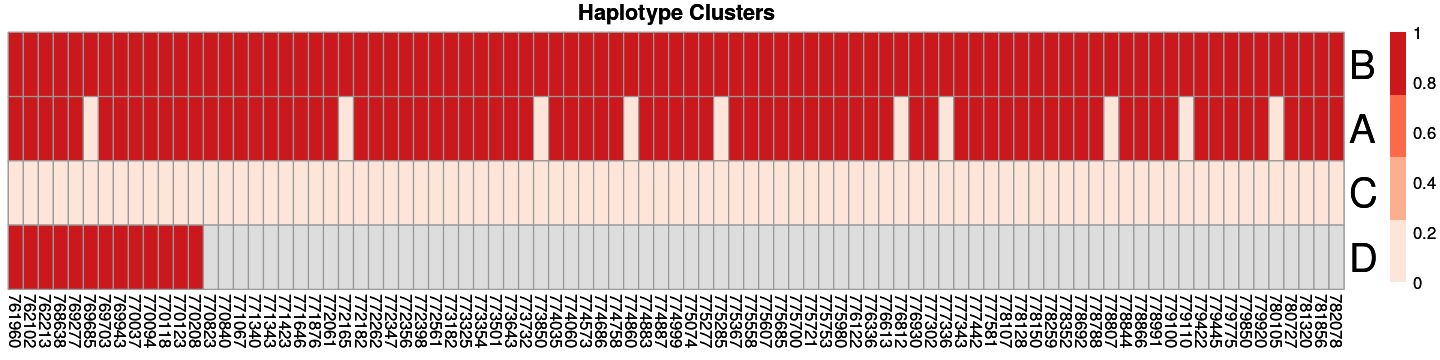

In [297]:
collapsed.mat <- clusters$clusters$centers
collapsed.mat[collapsed.mat == 0.5] <- NA
rownames(collapsed.mat) <- c("D", "A", "B", "C")
#collapsed.mat[,collapsed.mat["A",] < 0.5] <- 1-collapsed.mat[,collapsed.mat["A",] < 0.5]

#clusters$clusters$size

collapsed.mat[collapsed.mat>0.49 & collapsed.mat<0.51] <- NA

p <- pheatmap(collapsed.mat[c("B", "A", "C","D"),as.character(POS)], color=RColorBrewer::brewer.pal(4, "Reds"), 
              fontsize_row=24, cluster_rows=F,
              scale = "none", cluster_cols=F, main="Haplotype Clusters")
w=12 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("cluster_deletion.svg"), p, width=w, height=h)
p

#A1 <- colnames(collapsed.mat[,collapsed.mat["A",]>0.5])
#A1 <- A1[A1 > GAP_START]
#A0 <- colnames(collapsed.mat[, collapsed.mat["A",]<0.5])
#A0 <- A0[A0 > GAP_START]

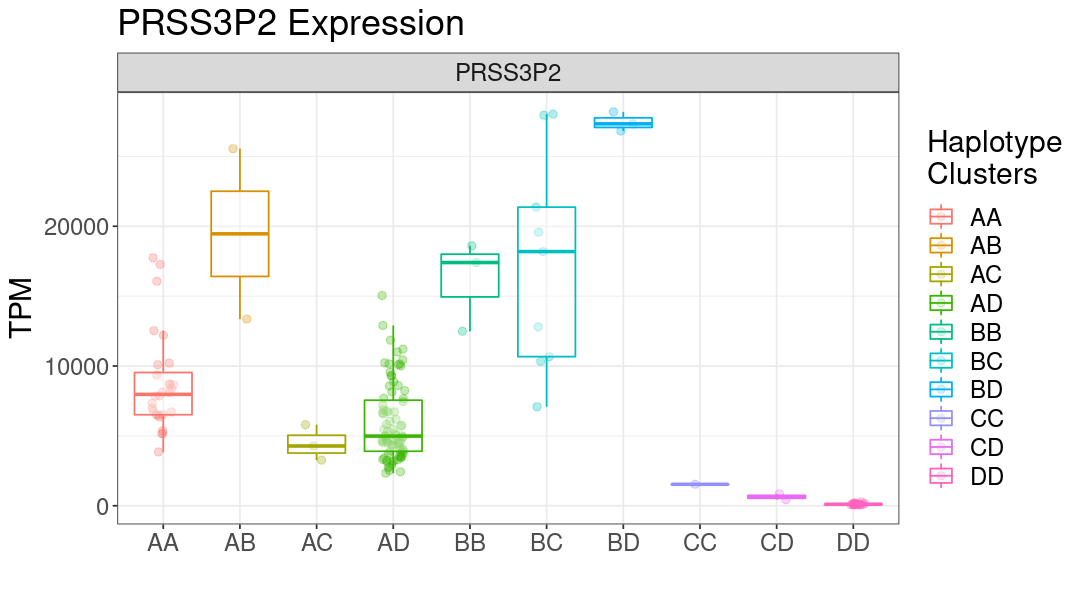

In [298]:
plot.df <- merge(gtex.haps, gtex.expression.df, by="sample")
plot.df <- plot.df[plot.df$gene == "PRSS3P2",]
plot.df <- plot.df[plot.df$cluster != ".",]
p <- ggplot(plot.df, aes(x=cluster, y=tpm, colour=cluster)) + 
     geom_point(size=2, alpha=0.3, position=position_jitter(height=0, width=0.15)) +
     geom_boxplot(outlier.alpha=0, alpha=0.4) + facet_wrap(~gene, scales="free_y") +
     scale_colour_discrete(name = "Haplotype\nClusters")

p <- add_theme(p, xlab="", ylab="TPM", "PRSS3P2 Expression")

w=9 ; h=5
options(repr.plot.width=w, repr.plot.height=h)
#ggsave(out_name("expression_by_deletion"), p, width=w, height=h)
ggsave(out_name("expression_by_deletion.svg"), p, width=w, height=h)
p

---
# 10X DATA

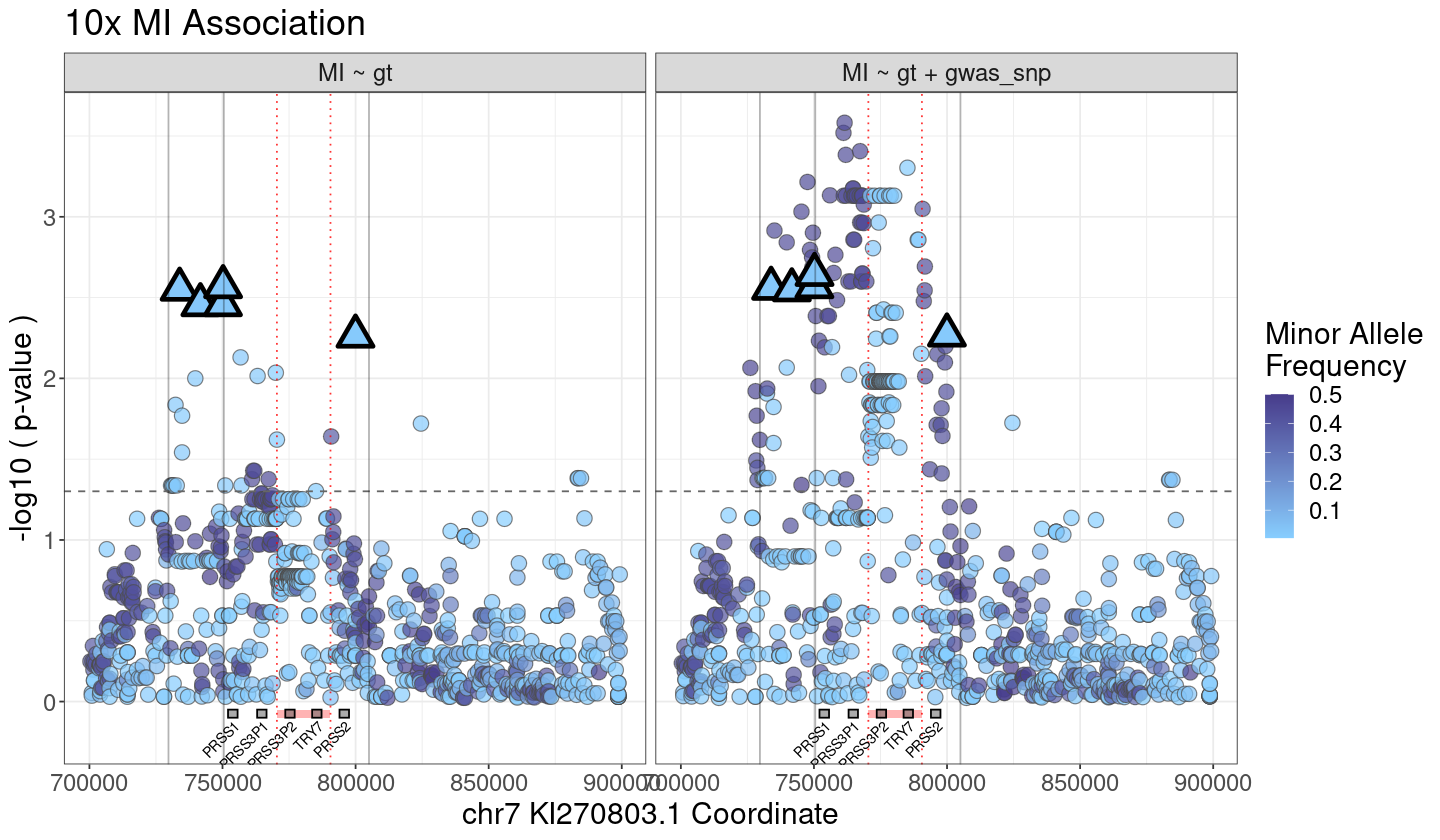

In [299]:
source("read_helper.R")
seq.association.df <- mi_association(gt.matrix, seq.df, covariates=c(), gt.cov=c(""))
seq.association.df <- seq.association.df[, !colnames(seq.association.df) %in% c("mac")]
seq.association.df <- merge(seq.association.df, variant.df, by="pos")
seq.association.df$group = "MI ~ gt"

sad <- seq.association.df[seq.association.df$var=="gt",]
sad$chr <- "KI270803.1"
write.table(sad[, c("chr","pos","p")], "pvalue.txt", quote=F, row.names=F)

#733893, 750168
sadf <- mi_association(gt.matrix, seq.df, covariates=c(), gt.cov=c(GWAS_TOP))
sadf <- sadf[, !colnames(sadf) %in% c("mac")]
sadf <- merge(sadf, variant.df, by="pos")
sadf$group = "MI ~ gt + gwas_snp"

FINEMAP <- sadf[sadf$p < 0.05 & sadf$var == "gt",]$pos
TOP_FINEMAP <- seq.association.df[seq.association.df$p < 0.007 &
                                  seq.association.df$var == "gt" & 
                                  seq.association.df$maf < 0.3,]$pos
seq.association.df <- rbind(seq.association.df, sadf)

seq.association.df <- seq.association.df[seq.association.df$p < 0.95,]

CLUSTER_POS <- sadf[sadf$p < 0.05 & 
                      sadf$var=="gt" &
                      sadf$pos < GAP_END,]$pos
#CLUSTER_POS <- CLUSTER_POS[! CLUSTER_POS %in% SIG_POS]
CLUSTER_RISK <- sadf[sadf$p < 0.05 &sadf$var=="gt" & sadf$pos < GAP_START,]$beta > 0

p <- plot_association(seq.association.df, colourby="maf", colourlegend="Minor Allele\nFrequency", 
                      highlight=c(TOP_FINEMAP), w=12, h=7, title="10x MI Association")
ggsave(out_name("10x_mi_association.svg"), p, width=8, height=7)

p <- p + geom_vline(xintercept = LD_START, alpha=0.3)
p <- p + geom_vline(xintercept = LD_MID, alpha=0.3)
p <- p + geom_vline(xintercept = LD_END, alpha=0.3) 

p

In [654]:
y <- as.numeric(hap.matrix[rownames(hap.matrix) == GWAS_TOP, ])
#y = del.status
ld.df <- do.call(rbind, ( lapply(rownames(hap.matrix), FUN=calculate_ld, y=y, mat=hap.matrix)) )
ld.df <- ld.df[!is.na(ld.df$pos),]

#ld.df[ld.df$r2 > 0.75,]
G1 <- ld.df[ld.df$r2 > 0.8,]$pos
mn <- min(as.numeric(as.character(G1)))
mx <- max(as.numeric(as.character(G1)))

ALL <- rownames(hap.matrix)
ALL <- ALL[ALL >= mn & ALL <= mx]
length(ALL)

[1] 393

In [48]:
SNPS3 <- c(733893, 750217, #750168,741691,
           772165, 779920) #769685 )

POS <- c(SNPS3)
mat <- imputed.hap.mat[rownames(imputed.hap.mat) %in% c(POS),]
mat <- cbind(mat, imputed.gtex.hap.matrix[rownames(imputed.gtex.hap.matrix) %in% c(POS),])
mat <- imputed.gtex.hap.matrix[rownames(imputed.gtex.hap.matrix) %in% c(POS),]


mat[is.na(mat) | mat< 0] <- -1


k=9
clusters <- kmeans_cluster_haplotypes(mat, k)
table(clusters$hap.df$cluster)

clusters$df$cluster <- sapply(1:nrow(clusters$df), 
                     FUN=function(i) paste(clusters$df$cluster.1[i], 
                                           clusters$df$cluster.2[i], sep=""))

#label clusters
#rep <- c("QUL28163_03A.1", "OSK7719_03A.1", "BSP21041_03A.2", "OSK7706_03A.1")
#labels <- "ABCDE"
#clusters <- label_clusters(clusters, rep, labels)
#table(clusters$hap.df$cluster)

p <- fviz_cluster(clusters$clusters, geom = "point", data=clusters$mat)
p <- add_theme(p, title=paste("Cluster PCA, k =", k)) 

x="Cluster"
p <- p + labs(colour=x, fill=x, shape=x)
#colours <- c("#56B4E9", "#E69F00", "#009E73", "#CC79A7")
#p <- p + scale_colour_manual(values = colours) +
#         scale_fill_manual(values = colours)

cnames <- unique(c(clusters$df$cluster.1, clusters$df$cluster.2))
for (clust in cnames[order(cnames)]){
    cx=clusters$df$sample[clusters$df$cluster.1 == clust | clusters$df$cluster.2 == clust]
    cx2=clusters$df$sample[clusters$df$cluster.1 == clust & clusters$df$cluster.2 == clust]

    mi <- filtered.df[filtered.df$sample %in% cx,]$mi
    print(paste(length(mi), mean(mi)))
}

w=5 ; h=4
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("cluster_deletion_pca.svg"), p, width=w, height=h)
p


# 1 and 6 share risk allele with 7 (but 7 is most common -> has deletion)
# 2 has 1/2 with mi (by chance?)
# 5 -> other allele is 3!

#clusters$df[clusters$df$cluster.1 == "3" | clusters$df$cluster.2 == "3",]
#clusters$df[clusters$df$cluster.1 == "7" | clusters$df$cluster.2 == "7",]

ERROR: Error in eval(expr, envir, enclos): object 'imputed.hap.mat' not found


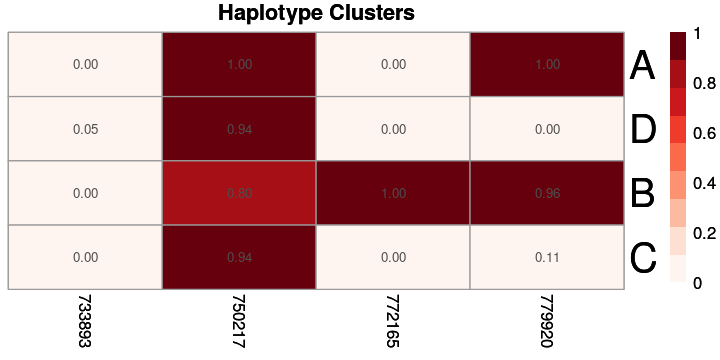

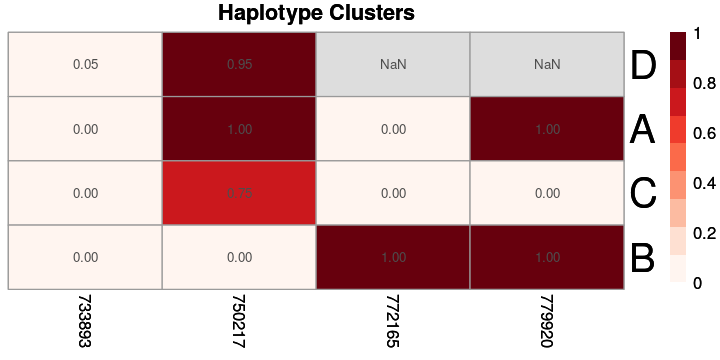

In [71]:
mat <- collapse_clusters(clusters$hap.df[clusters$hap.df$sample %in% colnames(imputed.gtex.hap.matrix),], imputed.gtex.hap.matrix)

p <- pheatmap(mat[,colnames(mat)%in%SNPS3], color=RColorBrewer::brewer.pal(9, "Reds"), 
              fontsize_row=24, cluster_rows=F, display_numbers=T,
              scale = "none", cluster_cols=F, main="Haplotype Clusters")
w=6 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
p


mat <- collapse_clusters(clusters$hap.df[clusters$hap.df$sample %in% colnames(imputed.hap.mat),], imputed.hap.mat)
p <- pheatmap(mat[,colnames(mat)%in%SNPS3], color=RColorBrewer::brewer.pal(9, "Reds"), 
              fontsize_row=24, cluster_rows=F, display_numbers=T,
              scale = "none", cluster_cols=F, main="Haplotype Clusters")
w=6 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
p

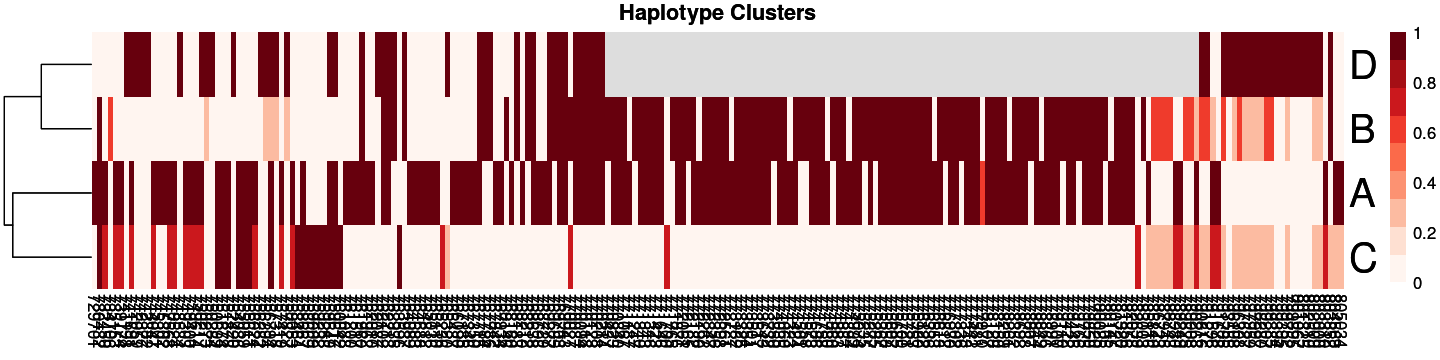

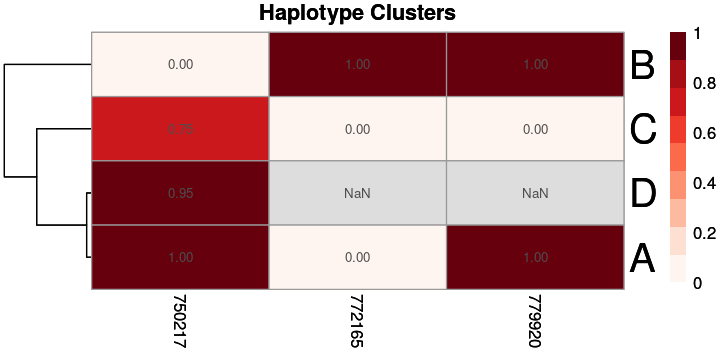

In [72]:
#sdf[sdf$pos %in% c(CLUSTER_POS, SIG_POS) & sdf$group == "MI ~ gt",]
mat <- collapse_clusters(clusters$hap.df[clusters$hap.df$sample %in% colnames(imputed.hap.mat),], imputed.hap.mat)
mat <- mat[,colnames(mat)>=LD_START & colnames(mat)<=LD_END]

mat <- mat[,colVars(mat,na.rm=TRUE) > 0.1]


#m[,colnames(m)>GAP_START & colnames(m)<GAP_END ]
#mat <- mat[,colnames(mat) %in% c(CLUSTER_POS, SIG_POS)]
#mat <- clusters$clusters$centers

#mat[,colnames(mat) %in% CLUSTER_POS[!CLUSTER_RISK]] <- 1- mat[,colnames(mat) %in% CLUSTER_POS[!CLUSTER_RISK]] 

#rownames(mat) <- c("C","D","E","B","A")

p <- pheatmap(mat, color=RColorBrewer::brewer.pal(9, "Reds"), 
              fontsize_row=24, cluster_rows=T,
              scale = "none", cluster_cols=F, main="Haplotype Clusters")
w=12 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
p


p <- pheatmap(mat[,colnames(mat)%in%SNPS3], color=RColorBrewer::brewer.pal(9, "Reds"), 
              fontsize_row=24, cluster_rows=T, display_numbers=T,
              scale = "none", cluster_cols=F, main="Haplotype Clusters")
w=6 ; h=3
options(repr.plot.width=w, repr.plot.height=h)
p


In [1355]:
sdf <- seq.df[seq.df$pi=="PI" & seq.df$mi %in% c(0,1),]
pdf <- merge(sdf, clusters$df, by="sample")

do.call(rbind, lapply(c("1","2","3","4","5","6","7","8"),
                      FUN=cluster_regression, pdf, 
                      dominant=TRUE, add.del=FALSE))


pdf <- pdf[pdf$cluster.1 %in% c(4,8) & pdf$cluster.2 %in% c(4,8),]
do.call(rbind, lapply(c("4","8"),
                      FUN=cluster_regression, pdf, 
                      dominant=FALSE, add.del=FALSE))



beta       p            var           cluster mi.0      mi.1      n    count
2  16.0635878 9.794688e-01 cluster.count 1       0.1827957 1.0000000 1120   2  
21  1.4931244 1.377451e-01 cluster.count 2       0.1834532 0.5000000 1120   4  
22  1.9884697 2.379043e-05 cluster.count 3       0.1703704 0.6000000 1120  20  
23 -0.6146688 1.335166e-02 cluster.count 4       0.2678571 0.1651786 1120 448  
24 16.0635878 9.794688e-01 cluster.count 5       0.1827957 1.0000000 1120   2  
25 17.0833909 9.812707e-01 cluster.count 6       0.1798561 1.0000000 1120   4  
26  1.2115429 4.774010e-03 cluster.count 7       0.1753731 0.4166667 1120  24  
27 -0.2211213 3.304175e-01 cluster.count 8       0.2087912 0.1746032 1120 378

beta       p         var           cluster mi.0      mi.1      mi.2     
2  -0.1829145 0.3162968 cluster.count 4       0.1818182 0.1544118 0.1333333
21  0.1829145 0.3162968 cluster.count 8       0.1333333 0.1544118 0.1818182
   n    count
2  1020 572  
21 1020 448

[1] 10

[1] 0.02173913

[1] 17

[1] 0.03695652

[1] 18

[1] 0.03913043

chrom               pos    ref alt info                   platform dr2 
183  chr7_KI270803v1_alt 733893 A   G   DR2=0.04;AF=0.0297;IMP 370k     0.04
241  chr7_KI270803v1_alt 750168 A   T   DR2=0.11;AF=0.9835;IMP 370k     0.11
243  chr7_KI270803v1_alt 750217 T   C   DR2=0.10;AF=0.9808;IMP 370k     0.10
1361 chr7_KI270803v1_alt 733893 A   G   DR2=0.05;AF=0.0254;IMP 660k     0.05
1419 chr7_KI270803v1_alt 750168 A   T   DR2=0.14;AF=0.9829;IMP 660k     0.14
1421 chr7_KI270803v1_alt 750217 T   C   DR2=0.14;AF=0.9809;IMP 660k     0.14
2539 chr7_KI270803v1_alt 733893 A   G   DR2=0.05;AF=0.0276;IMP 660w     0.05
2597 chr7_KI270803v1_alt 750168 A   T   DR2=0.16;AF=0.9807;IMP 660w     0.16
2599 chr7_KI270803v1_alt 750217 T   C   DR2=0.16;AF=0.9794;IMP 660w     0.16
3717 chr7_KI270803v1_alt 733893 A   G   DR2=0.05;AF=0.0204;IMP gwas1    0.05
3775 chr7_KI270803v1_alt 750168 A   T   DR2=0.57;AF=0.9799;IMP gwas1    0.57
3777 chr7_KI270803v1_alt 750217 T   C   DR2=0.49;AF=0.9767;IMP gwas1    0.49
4895 chr7_KI270803v1_alt 733893 A   G   DR2=0.04;AF=0.0287;IMP gwas3    0.04
4953 chr7_KI270803v1_alt 750168 A   T   DR2=0.15;AF=0.9795;IMP gwas3    0.15
4955 chr7_KI270803v1_alt 750217 T   C   DR2=0.15;AF=0.9784;IMP gwas3    0.15
6073 chr7_KI270803v1_alt 733893 A   G   DR2=1.00;AF=0.0108     omni5    1.00
6131 chr7_KI270803v1_alt 750168 A   T   DR2=0.83;AF=0.9730;IMP omni5    0.83
6133 chr7_KI270803v1_alt 750217 T   C   DR2=0.75;AF=0.9683;IMP omni5    0.75
     dr2.del af     af.del imp  
183  NA      0.0297 NA      TRUE
241  NA      0.9835 NA      TRUE
243  NA      0.9808 NA      TRUE
1361 NA      0.0254 NA      TRUE
1419 NA      0.9829 NA      TRUE
1421 NA      0.9809 NA      TRUE
2539 NA      0.0276 NA      TRUE
2597 NA      0.9807 NA      TRUE
2599 NA      0.9794 NA      TRUE
3717 NA      0.0204 NA      TRUE
3775 NA      0.9799 NA      TRUE
3777 NA      0.9767 NA      TRUE
4895 NA      0.0287 NA      TRUE
4953 NA      0.9795 NA      TRUE
4955 NA      0.9784 NA      TRUE
6073 NA      0.0108 NA     FALSE
6131 NA      0.9730 NA      TRUE
6133 NA      0.9683 NA      TRUE

[1] "nsamples:"


[1] 249

[1] "7 0.286"
[1] "10 0.3"
[1] "0 NaN"
[1] "nsamples:"


[1] 1242

[1] "205 0.2"
[1] "85 0.271"
[1] "0 NaN"


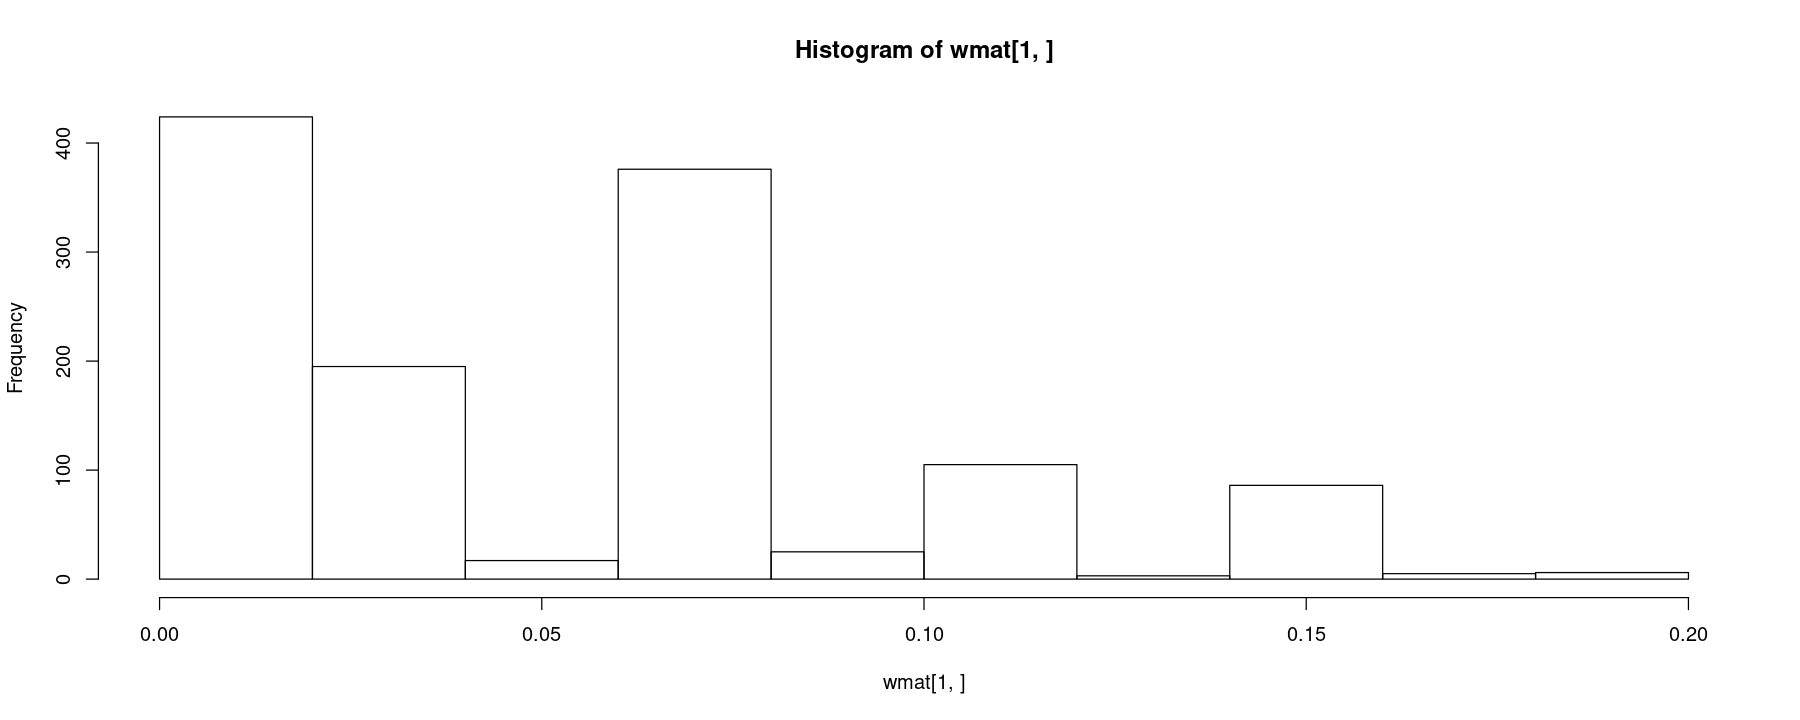

In [1317]:
g.mat <- imputed.gtex.hap.matrix[rownames(imputed.gtex.hap.matrix) %in% c(733893, 750168, 750217),]

x1 <- g.mat[1,] > 0
x2 <- g.mat[2,] < 1
x3 <- g.mat[3,] < 1

sum(x1)
mean(x1)
sum(x2)
mean(x2)
sum(x3)
mean(x3)


quality.df[quality.df$pos %in% c(733893, 750168, 750217),]

omni <- array.df[array.df$platform == "Omni5", c("sample","mi")]
omni <- omni[order(omni$sample),]
omnimat <- imputed.gt.matrix[rownames(imputed.gt.matrix) %in% c(733893, 750168, 750217),
                             colnames(imputed.gt.matrix) %in% omni$sample]
omnimat <- omnimat[,order(colnames(omnimat))]
print("nsamples:")
nrow(omni)

omni$x1 <- omnimat[1,] > 0
omni$x2 <- omnimat[2,] < 2
omni$x2 <- omnimat[3,] < 2

print(paste( sum(omni$x1), round(mean(omni[omni$x1,]$mi),3) ))
print(paste( sum(omni$x2), round(mean(omni[omni$x2,]$mi),3) ))
print(paste( sum(omni$x3), round(mean(omni[omni$x3,]$mi),3) ))



w <- array.df[array.df$platform == "660W", c("sample","mi")]
wmat <- w[order(w$sample),]

wmat <- imputed.ds.matrix[rownames(imputed.ds.matrix) %in% c(733893, 750168, 750217),
                             colnames(imputed.ds.matrix) %in% w$sample]
wmat <- wmat[,order(colnames(wmat))]

print("nsamples:")
nrow(w)
hist(wmat[1,])
w$x1 <- wmat[1,] > 0.1
w$x2 <- wmat[2,] < 1.9
w$x2 <- wmat[3,] < 1.9

print(paste( sum(w$x1), round(mean(w[w$x1,]$mi),3) ))
print(paste( sum(w$x2), round(mean(w[w$x2,]$mi),3) ))
print(paste( sum(w$x3), round(mean(w[w$x3,]$mi),3) ))



---
# Analysis - ASSOCIATION

In [ ]:

### MI ASSOCIATION CODE 

run_model <- function(pos, mat, pheno.df, covariates=c()){
    pos <- as.numeric(pos)
    df <- data.frame(sample=colnames(mat),
                     gt=mat[rownames(mat) == pos,])
    df <- merge(df, pheno.df, all.x=TRUE)
    
    regression="mi ~ gt"
    
    for (covariate in covariates){        
        df[,covariate] = pheno.df[,covariate]
        
        if(length(unique(as.character(df[,covariate])))>1){  
            regression = paste(regression, "+", covariate)
        }
    }

    options(warn=-1)
    model=glm(regression, data=df, family="binomial")
    options(warn=0)

    coef <- summary(model)$coefficients
    summary.df <- data.frame(beta=coef[,1], p=coef[,4])
    summary.df$pos <- pos
    summary.df$var <- row.names(summary.df)
    n <- sum(df$gt)
    summary.df$mac <- min(n, 2*length(df$gt)-n)
    summary.df$n <- nrow(df)

    row.names(summary.df) <- NULL
    return(summary.df)
}

hap_names <- function(names){ 
    add_hap_name <- function(name, append){ return(paste(name, append, sep=".")) }
    hapnames = c( sapply(names, add_hap_name, append="1"),
                  sapply(names, add_hap_name, append="2"))
    return(hapnames)
}

mi_association <- function(mat, pheno.df, covariates=c(), splitby=NA, gt.cov=c(), calc.ld=-1){
    
    for (pos in gt.cov){
        name=paste("pos",as.character(pos),sep="_")
        covariates <- c(covariates, name)
        df <- data.frame(sample=colnames(mat))
        df[,name] <- mat[rownames(mat) == pos,]
        pheno.df <- merge(pheno.df, df, by="sample", all.x=TRUE)            
    }
    
    filter <- (pheno.df$mi %in% c(0,1)) & (pheno.df$pi %in% c("PI",1))
    pheno.df <- pheno.df[filter,]    
    mat <- mat[,colnames(mat) %in% pheno.df$sample]
    temp <- data.frame(sample=colnames(mat))
    pheno.df <- merge(temp, pheno.df, by="sample")
    
    run <- function(m, pdf, group=NA){
        summary.df <- do.call("rbind", lapply(rownames(m), FUN=run_model, 
                                    mat=m, pheno.df=pdf, covariates=covariates))
        if (!is.na(group)){summary.df$group = group}
        
        return(summary.df)
    }

    if (!is.na(splitby)){
        run_group <- function(group){
            pdf <- pheno.df[pheno.df[,splitby]==group,]    
            m <- mat[!rownames(mat) %in% gt.cov, colnames(mat) %in% pdf$sample]
            summary.df <- run(m,pdf,group)
            if (length(calc.ld)==2){
                
                hapmat <- calc.ld$mat[,colnames(calc.ld$mat) %in% hap_names(colnames(m))]
                ld.df <- do.call(rbind, (lapply(rownames(m), FUN=calculate_ld, 
                                                ypos=calc.ld$pos, mat=hapmat)))

                summary.df <- merge(summary.df, ld.df, by="pos", all.x=TRUE)
            } 
            return(summary.df)
        }
        summary.df <- do.call("rbind", lapply(unique(pheno.df[,splitby]), FUN=run_group))
    } else{
        summary.df <- do.call("rbind", lapply(rownames(mat)[!rownames(mat) %in% gt.cov], 
                    FUN=run_model, mat=mat, pheno.df=pheno.df, covariates=covariates))
        summary.df$group <- "MI"
        
        if (length(calc.ld)==2){
                hapmat <- calc.ld$mat[,colnames(calc.ld$mat) %in% hap_names(colnames(mat))]
                ld.df <- do.call(rbind, (lapply(rownames(mat), FUN=calculate_ld, 
                                                ypos=calc.ld$pos, mat=hapmat)))
                summary.df <- merge(summary.df, ld.df, by="pos", all.x=TRUE)
        }
    }
    
    return(summary.df)
}

[1] 733893 739775 741691 750168 750217 756794 763183 770027 799962

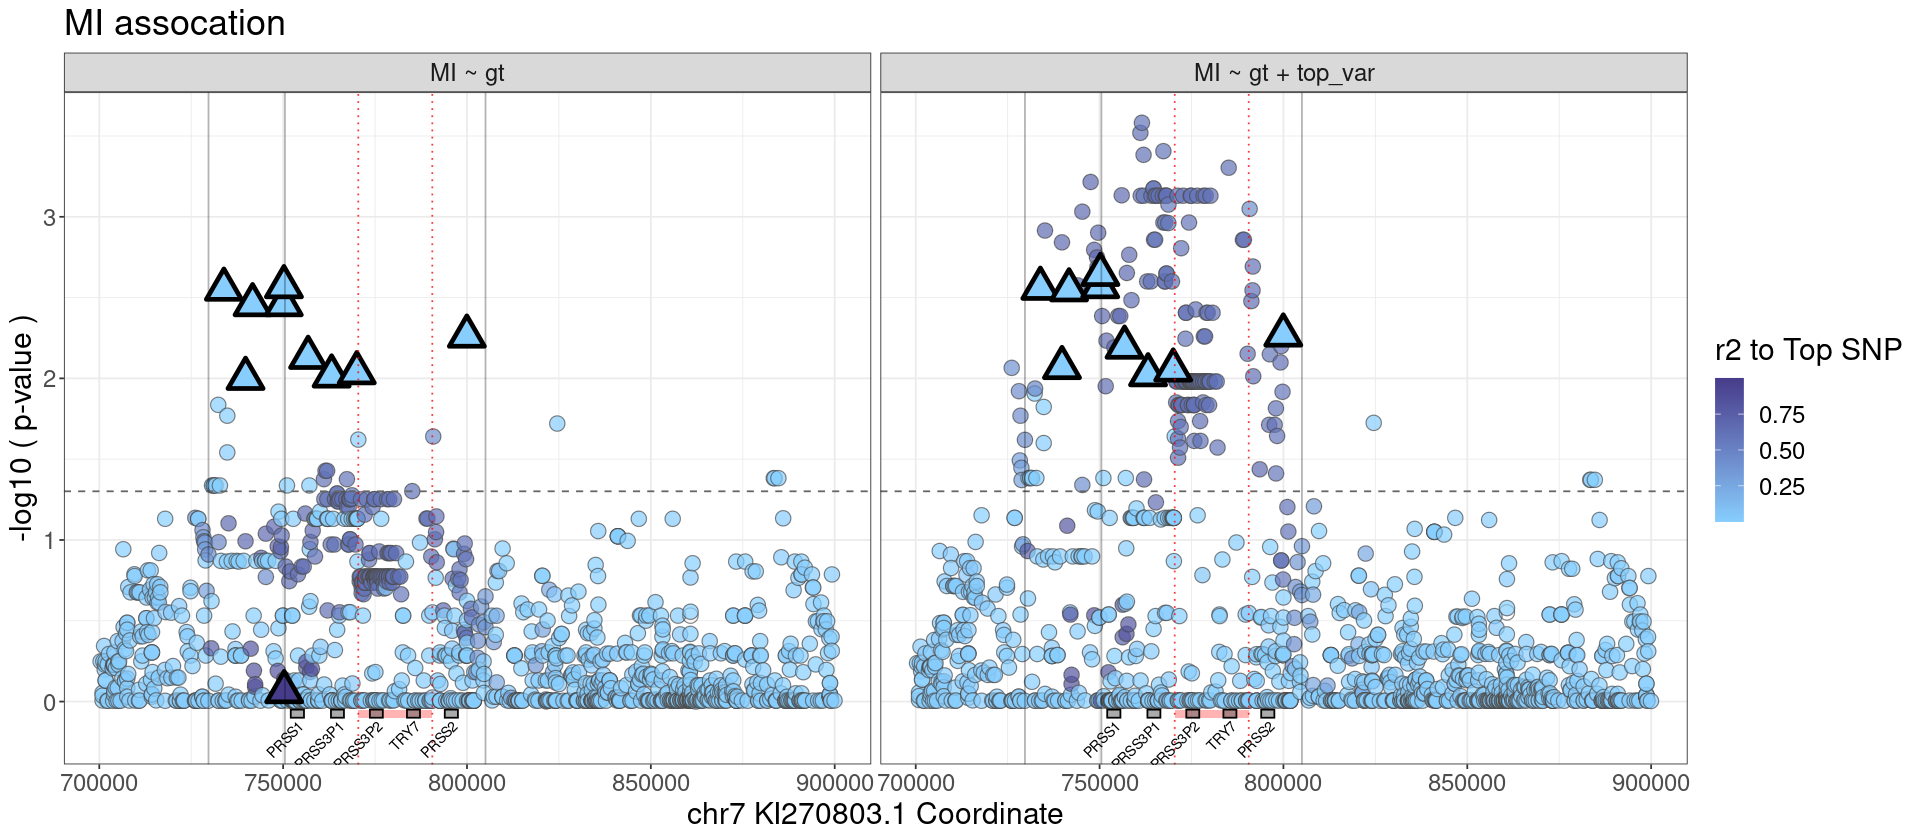

In [56]:
sdf <- mi_association(gt.matrix, seq.df, covariates=c(), gt.cov=c())
sdf$group = "MI ~ gt"
sdf <- sdf[sdf$var == "gt",]

sadf <- mi_association(gt.matrix, seq.df, covariates=c(), gt.cov=c(GWAS_TOP)) 
                       #covariates=c("del"), gt.cov=c())
sadf$group = "MI ~ gt + top_var"
#sadf <- sadf[sadf$var == "pos_750284",]
sadf <- sadf[sadf$var == "gt",]


FINEMAP<- sdf[-log10(sdf$p)>2,]$pos

y <- as.numeric(gt.matrix[rownames(gt.matrix) == GWAS_TOP, ])
ld.df <- do.call(rbind, ( lapply(rownames(gt.matrix), FUN=calculate_ld, y=y, mat=gt.matrix)) )
ld.df <- ld.df[!is.na(ld.df$pos),]

sdf <- rbind(sdf, sadf)

sdf <- merge(sdf, ld.df, by="pos")
p <- plot_association(sdf, highlight=c(FINEMAP, GWAS_TOP), 
                      colourby="r2", colourlegend="r2 to Top SNP", 
                      w=16, h=7)

p <- p + geom_vline(xintercept = LD_START, alpha=0.3)
p <- p + geom_vline(xintercept = LD_END, alpha=0.3) 
p <- p + geom_vline(xintercept = LD_MID, alpha=0.3)

p

FINEMAP



In [80]:
count_mi <- function(pos, split=F){
    
    df <- data.frame(sample=colnames(gt.matrix), gt2=gt.matrix[rownames(gt.matrix) == GWAS_TOP,],
                                             gt=gt.matrix[rownames(gt.matrix) == pos,])
    df <- merge(df, seq.df, by="sample")
    df <- na.omit(df[df$mi %in% c(0,1) & df$pi == "PI",])
    print("-----")
    if (!split){
        print(mean(df[df$gt == 0,]$mi))
        print(mean(df[df$gt == 1,]$mi))
        print(mean(df[df$gt == 2,]$mi))
   }
    
    if (split){
        print("gt=0")
        print(mean(df[df$gt2 == 0 & df$gt == 0,]$mi))
        print(mean(df[df$gt2 == 0 & df$gt == 1,]$mi))
        print(mean(df[df$gt2 == 0 & df$gt == 2,]$mi))
        
        print("gt=1")
        print(mean(df[df$gt2 == 1 & df$gt == 0,]$mi))
        print(mean(df[df$gt2 == 1 & df$gt == 1,]$mi))
        print(mean(df[df$gt2 == 1 & df$gt == 2,]$mi))

        print("gt=2")
        print(mean(df[df$gt2 == 2 & df$gt == 0,]$mi))
        print(mean(df[df$gt2 == 2 & df$gt == 1,]$mi))
        print(mean(df[df$gt2 == 2 & df$gt == 2,]$mi))
   }

}

count_mi(776553)
count_mi(776553, split=T)

sadf[-log10(sadf$p) > 3,]

[1] "-----"
[1] 0.2678571
[1] 0.1812081
[1] 0.1333333
[1] "-----"
[1] "gt=0"
[1] 1
[1] 0.3684211
[1] 0.1388889
[1] "gt=1"
[1] 0.3636364
[1] 0.1550388
[1] 0
[1] "gt=2"
[1] 0.2272727
[1] 0
[1] NaN


beta      p            pos    var mac n   group            
640  -1.407498 0.0009295453 745301 gt  260 280 MI ~ gt + top_var
655  -1.483143 0.0006087467 747568 gt  259 280 MI ~ gt + top_var
832  -1.436687 0.0007360313 756024 gt  264 280 MI ~ gt + top_var
940  -1.462638 0.0003024189 761088 gt  263 280 MI ~ gt + top_var
946  -1.373872 0.0007408036 761200 gt  261 280 MI ~ gt + top_var
949  -1.472543 0.0002618601 761517 gt  262 280 MI ~ gt + top_var
955  -1.388526 0.0004136357 761962 gt  262 280 MI ~ gt + top_var
958  -1.373872 0.0007408036 762010 gt  261 280 MI ~ gt + top_var
1009 -1.373872 0.0007408036 764089 gt  261 280 MI ~ gt + top_var
1015 -1.378662 0.0006683432 764683 gt  260 280 MI ~ gt + top_var
1018 -1.378662 0.0006683432 764688 gt  260 280 MI ~ gt + top_var
1027 -1.373872 0.0007408036 765036 gt  261 280 MI ~ gt + top_var
1042 -1.373872 0.0007408036 765437 gt  261 280 MI ~ gt + top_var
1066 -1.373872 0.0007408036 766090 gt  261 280 MI ~ gt + top_var
1084 -1.373872 0.0007408036 767185 gt  261 280 MI ~ gt + top_var
1087 -1.408691 0.0003923549 767346 gt  263 280 MI ~ gt + top_var
1108 -1.373872 0.0007408036 767934 gt  261 280 MI ~ gt + top_var
1114 -1.373872 0.0007408036 768160 gt  261 280 MI ~ gt + top_var
1120 -1.373872 0.0007408036 768210 gt  261 280 MI ~ gt + top_var
1138 -1.292076 0.0008399980 768729 gt  265 280 MI ~ gt + top_var
1198 -1.373872 0.0007408036 771187 gt  261 280 MI ~ gt + top_var
1258 -1.373872 0.0007408036 772727 gt  261 280 MI ~ gt + top_var
1315 -1.373872 0.0007408036 774780 gt  261 280 MI ~ gt + top_var
1327 -1.373872 0.0007408036 774894 gt  261 280 MI ~ gt + top_var
1381 -1.373872 0.0007408036 776553 gt  261 280 MI ~ gt + top_var
1426 -1.373872 0.0007408036 778261 gt  261 280 MI ~ gt + top_var
1444 -1.373872 0.0007408036 778849 gt  261 280 MI ~ gt + top_var
1483 -1.373872 0.0007408036 780145 gt  261 280 MI ~ gt + top_var
1531 -1.441286 0.0004971958 785116 gt  260 280 MI ~ gt + top_var
1597  1.214258 0.0008931294 790816 gt  227 280 MI ~ gt + top_var

In [218]:
#sdf[sdf$p < 0.004 & sdf$group == "MI ~ gt + del",]

df <- data.frame(sample=colnames(gt.matrix), gt=gt.matrix[rownames(gt.matrix) == GWAS_TOP,],
                                             gt2=gt.matrix[rownames(gt.matrix) == 771187,])
df <- merge(df, seq.df, by="sample")
df <- na.omit(df[df$mi %in% c(0,1) & df$pi == "PI",])

mean(df[df$gt == 0,]$mi)
mean(df[df$gt == 1,]$mi)
mean(df[df$gt == 2,]$mi)


print("=============")



df2 <- data.frame(sample=colnames(gt.matrix), gt=gt.matrix[rownames(gt.matrix) == 761517,])
df2 <- merge(df2, seq.df, by="sample")
df2 <- na.omit(df2[df2$mi %in% c(0,1) & df2$pi == "PI",])
mean(df2[df2$del == 0,]$mi)
mean(df2[df2$del == 1,]$mi)
mean(df2[df2$del == 2,]$mi)

print("gt=0")
ddd <- df[df$gt == 0,]
print(paste(mean(ddd[ddd$gt2 == 0,]$mi), nrow(ddd[ddd$gt2 == 0,])))
print(paste(mean(ddd[ddd$gt2 == 1,]$mi), nrow(ddd[ddd$gt2 == 1,])))
print(paste(mean(ddd[ddd$gt2 == 2,]$mi), nrow(ddd[ddd$gt2 == 2,])))

print(" ")
print(" ")
print("gt=1")
ddd <- df[df$gt == 1,]
print(paste(mean(ddd[ddd$gt2 == 0,]$mi), nrow(ddd[ddd$gt2 == 0,])))
print(paste(mean(ddd[ddd$gt2 == 1,]$mi), nrow(ddd[ddd$gt2 == 1,])))
print(paste(mean(ddd[ddd$gt2 == 2,]$mi), nrow(ddd[ddd$gt2 == 2,])))

print(" ")
print(" ")
print("gt=2")
ddd <- df[df$gt == 2,]
print(paste(mean(ddd[ddd$gt2 == 0,]$mi), nrow(ddd[ddd$gt2 == 0,])))
print(paste(mean(ddd[ddd$gt2 == 1,]$mi), nrow(ddd[ddd$gt2 == 1,])))
print(paste(mean(ddd[ddd$gt2 == 2,]$mi), nrow(ddd[ddd$gt2 == 2,])))



[1] 0.1956522

[1] 0.1678322

[1] 0.2222222

[1] "============="


[1] 0.1558442

[1] 0.1854305

[1] 0.2307692

[1] "gt=0"
[1] "1 1"
[1] "0.368421052631579 19"
[1] "0.138888888888889 72"
[1] " "
[1] " "
[1] "gt=1"
[1] "0.363636363636364 11"
[1] "0.155038759689922 129"
[1] "0 3"
[1] " "
[1] " "
[1] "gt=2"
[1] "0.227272727272727 44"
[1] "0 1"
[1] "NaN 0"


In [100]:
sdf[sdf$group =="MI ~ gt" & sdf$p <0.03,]

x<-hap.matrix[rownames(hap.matrix) %in% sdf[sdf$group =="MI ~ gt" & sdf$p <0.03,]$pos, ]
x <-x[, colSums(x, na.rm = T) > 0]

cx <- clusters$df[rownames(clusters$df) %in% colnames(x),]

cx
mean(na.omit(seq.df[seq.df$sample %in% cx$sample,]$mi))



pos    beta       p           var mac n   group   d            
324  732350  1.4153706 0.014584550 gt   13 280 MI ~ gt -5.790552e-03
340  733893  1.9884697 0.002806090 gt   10 280 MI ~ gt  5.437469e-03
348  734807  1.3702082 0.028725303 gt   11 280 MI ~ gt -5.767013e-03
350  734813  1.5570242 0.017022060 gt   10 280 MI ~ gt -4.354683e-03
388  739775  1.3944606 0.009997539 gt   14 280 MI ~ gt -1.577101e-03
398  741691 -1.5537348 0.003500225 gt   15 280 MI ~ gt -2.989431e-03
468  750168 -1.5537348 0.003500225 gt   15 280 MI ~ gt -5.790552e-03
470  750217 -1.4657313 0.002707241 gt   18 280 MI ~ gt -4.425300e-03
567  756794 -1.4534337 0.007412874 gt   15 280 MI ~ gt -8.615211e-03
650  763183  1.7846420 0.009669099 gt    9 280 MI ~ gt -1.412330e-04
776  770027  2.9400434 0.009227641 gt    5 280 MI ~ gt -7.061648e-05
791  770437  2.6317420 0.023930626 gt    4 280 MI ~ gt -4.707765e-05
1064 790816  0.4821375 0.022893317 gt  227 280 MI ~ gt  1.606054e-01
1179 799962  2.0767784 0.005476905 gt    8 280 MI ~ gt  2.683426e-03
1421 824553  1.3513194 0.019036911 gt   12 280 MI ~ gt  6.873338e-03
     dprime       r2          
324  -0.256250000 3.133232e-03
340   0.279661017 3.139052e-03
348  -0.291666667 3.531073e-03
350  -0.237179487 2.161914e-03
388  -0.074444444 2.471889e-04
398  -0.132291667 8.350833e-04
468  -0.256250000 3.133232e-03
470  -0.164912281 1.554684e-03
567  -0.338888889 6.201357e-03
650  -0.008333333 2.456399e-06
776  -0.008333333 1.207205e-06
791  -0.008333333 8.002433e-07
1064  0.731924480 4.182513e-01
1179  0.193220339 1.057979e-03
1421  0.449922958 6.328396e-03

sample       cluster.1 cluster.2 cluster
ACH14003_03.1  ACH14003_03  D         A         AD     
ACH14023_03B.1 ACH14023_03B A         D         AD     
AFO20001_03.1  AFO20001_03  A         D         AD     
AFO3892_03.1   AFO3892_03   A         D         AD     
BCH12028_03A.1 BCH12028_03A A         A         AA     
BSP21004_03.1  BSP21004_03  A         A         AA     
BSP21040_03A.1 BSP21040_03A D         D         DD     
BSP21041_03A.1 BSP21041_03A D         C         CD     
BSP21045_03A.1 BSP21045_03A D         D         DD     
BSP21078_03A.1 BSP21078_03A A         C         AC     
BSP21080_03A.1 BSP21080_03A D         A         AD     
BSP21081_03A.1 BSP21081_03A A         A         AA     
BSP21082_03.1  BSP21082_03  D         A         AD     
BSP21083_03A.1 BSP21083_03A D         A         AD     
BSP21084_03A.1 BSP21084_03A A         D         AD     
BSP21085_03A.1 BSP21085_03A A         D         AD     
BSP21086_03B.1 BSP21086_03B A         A         AA     
BSP21087_03B.1 BSP21087_03B A         D         AD     
BSP21088_03A.1 BSP21088_03A A         A         AA     
BSP21089_03A.1 BSP21089_03A D         A         AD     
BSP21090_03A.1 BSP21090_03A A         A         AA     
BSP21091_03A.1 BSP21091_03A A         A         AA     
BSP21092_03A.1 BSP21092_03A D         A         AD     
BSP21093_03A.1 BSP21093_03A A         A         AA     
BSP21094_03A.1 BSP21094_03A A         A         AA     
BSP21095_03A.1 BSP21095_03A A         A         AA     
BSP21096_03A.1 BSP21096_03A A         A         AA     
BSP21097_03A.1 BSP21097_03A A         A         AA     
BSP21098_03A.1 BSP21098_03A D         D         DD     
BSP21099_03A.1 BSP21099_03A A         A         AA     
⋮              ⋮            ⋮         ⋮         ⋮      
QUL28117_03A.2 QUL28117_03A A         D         AD     
QUL28119_03.2  QUL28119_03  D         A         AD     
QUL28121_03A.2 QUL28121_03A A         D         AD     
QUL28122_03A.2 QUL28122_03A A         A         AA     
QUl28124_03B.2 QUl28124_03B D         A         AD     
QUL28125_03A.2 QUL28125_03A A         D         AD     
QUL28126_03.2  QUL28126_03  D         A         AD     
QUL28127_03A.2 QUL28127_03A A         D         AD     
QUL28128_03A.2 QUL28128_03A A         D         AD     
QUL28131_03A.2 QUL28131_03A D         A         AD     
QUL28132_03A.2 QUL28132_03A A         A         AA     
QUL28134_03A.2 QUL28134_03A A         D         AD     
QUL28139_03A.2 QUL28139_03A D         D         DD     
QUL28142_03A.2 QUL28142_03A A         A         AA     
QUL28152_03A.2 QUL28152_03A A         A         AA     
QUL28155_03A.2 QUL28155_03A D         D         DD     
QUL28156_03A.2 QUL28156_03A A         D         AD     
QUL28158_03A.2 QUL28158_03A A         A         AA     
QUL28159_03A.2 QUL28159_03A A         A         AA     
QUL28160_03A.2 QUL28160_03A A         A         AA     
QUL28161_03A.2 QUL28161_03A A         D         AD     
QUL28162_03A.2 QUL28162_03A D         A         AD     
QUL28163_03A.2 QUL28163_03A A         A         AA     
QUL28164_03A.2 QUL28164_03A A         A         AA     
QUL28165_03A.2 QUL28165_03A D         A         AD     
QUL28166_03A.2 QUL28166_03A A         A         AA     
QUL28169_03A.2 QUL28169_03A A         A         AA     
QUL28170_03D.2 QUL28170_03D D         A         AD     
SRP16021_03A.2 SRP16021_03A D         A         AD     
SRP16025_03A.2 SRP16025_03A D         A         AD

[1] 4.136364

Logistic regression testing relationship between variants and MI status. \
*Outside deletion*: `MI ~ genotype` \
*Inside deletion*: `MI ~ genotype + # deletions`

Association p-values for 925 variants are shown. Variants were called against HG38 alternative contig KI270803.1, trypsinogin genes are annotated as rectangles. The common deletion polymorphism is denoted by the red rectangle. Small variants are annotated as circles and coloured by the minor allele count within the 10X data.

In [245]:
sdf <- mi_association(gt.matrix, seq.df, covariates=c(), gt.cov=c())
sdf <- sdf[, !colnames(sdf) %in% c("mac")]
sdf <- merge(sdf, variant.df, by="pos")
sdf$group = "MI ~ gt"

sdf <- sdf[sdf$var == "gt",]
sdf[-log10(sdf$p) > 2,]

P=750217
zero = colnames(gt.matrix)[gt.matrix[rownames(gt.matrix) == P,] == 0]
one = colnames(gt.matrix)[gt.matrix[rownames(gt.matrix) == P,] == 1]
two = colnames(gt.matrix)[gt.matrix[rownames(gt.matrix) == P,] == 2]

table(gt.matrix[rownames(gt.matrix) == P ,])

filtered.df <- seq.df[!is.na(seq.df$mi) & seq.df$mi %in% c(0,1) & seq.df$pi %in% "PI",]
mean(filtered.df[filtered.df$sample %in% zero,]$mi)
mean(filtered.df[filtered.df$sample %in% one,]$mi)
mean(filtered.df[filtered.df$sample %in% two,]$mi)

tagged <- colnames(gt.matrix)[gt.matrix[rownames(gt.matrix) == P,] < 2]

dedup.df <- clusters$df[!duplicated(clusters$df$sample),]
table(dedup.df$cluster[dedup.df$sample %in% tagged])
table(dedup.df$cluster[dedup.df$sample %in% filtered.df$sample])


zero = colnames(gtex.matrix)[gtex.matrix[rownames(gtex.matrix) == P,] == 0]
one = colnames(gtex.matrix)[gtex.matrix[rownames(gtex.matrix) == P,] == 1]
two = colnames(gtex.matrix)[gtex.matrix[rownames(gtex.matrix) == P,] == 2]
tagged <- colnames(gtex.matrix)[gtex.matrix[rownames(gtex.matrix) == P,] < 2]

table(gtex.matrix[rownames(gtex.matrix) == P ,])
table(dedup.df$cluster[dedup.df$sample %in% tagged])
table(dedup.df$cluster[dedup.df$sample %in% colnames(gtex.matrix)])


pos    beta      p           var n   group   alt.count mac outside
341  733893  1.988470 0.002806090 gt  280 MI ~ gt  16       16  TRUE   
389  739775  1.394461 0.009997539 gt  280 MI ~ gt  17       17  TRUE   
399  741691 -1.553735 0.003500225 gt  280 MI ~ gt 696       18  TRUE   
469  750168 -1.553735 0.003500225 gt  280 MI ~ gt 696       18  TRUE   
471  750217 -1.465731 0.002707241 gt  280 MI ~ gt 693       21  TRUE   
569  756794 -1.453434 0.007412874 gt  280 MI ~ gt 696       18  TRUE   
653  763183  1.784642 0.009669099 gt  280 MI ~ gt  14       14  TRUE   
779  770027  2.940043 0.009227641 gt  280 MI ~ gt   6        6  TRUE   
1181 799962  2.076778 0.005476905 gt  280 MI ~ gt  12       12  TRUE   
     d            dprime     r2          maf        
341   0.012750915  1.0000000 0.030153754 0.022471910
389   0.009270375  0.6881188 0.015050907 0.023809524
399  -0.008662288 -0.6072607 0.012428918 0.025210084
469  -0.010062849 -0.7054455 0.016772968 0.025210084
471  -0.011039710 -0.6633663 0.017378512 0.029411765
569  -0.011463409 -0.8036304 0.021766851 0.025210084
653   0.011094634  1.0000000 0.026064516 0.019607843
779  -0.003648518 -1.0000000 0.006502769 0.008403361
1181  0.009563186  1.0000000 0.022486085 0.016853933


  0   1   2 
  1  19 337 

[1] 1

[1] 0.4375

[1] 0.1673004


3A 3D AB AD BC BD DD 
 8  6  1  2  1  1  1 


 3A  3D  AA  AB  AD  BC  BD  CD  DD 
  6   5  75   1 142   1   1   2  47 


  1   2 
 18 212 

< table of extent 0 >

< table of extent 0 >

---
---
---

In [1772]:
torpos <- c(intersect(rownames(imputed.gt.matrix), rownames(gt.matrix)), DEL_POS)
torsamp <- array.df[array.df$cohort=="TOR",]$sample
sibs <- endsWith(as.character(torsamp), "04")
overlap <- torsamp %in% overlap.df$array.id
#sum(sibs | overlap)

torsamp <- torsamp[!sibs & !overlap]

tor.matrix <- imputed.ds.matrix[torpos, colnames(imputed.ds.matrix) %in% torsamp]
tmat <- rbind(gt.matrix, seq.df$del)
rownames(tmat)[nrow(tmat)] <- DEL_POS
tor.matrix <- cbind(tor.matrix, tmat[torpos,])

tor.df <- array.df[array.df$cohort=="TOR", c("sample", "sex", "cohort", "platform", "mi", "pi")]
tdf <- data.frame(sample=seq.df$sample, sex=NA, cohort="TOR", platform="10x",
                  mi=seq.df$mi, pi=seq.df$pi)

tor.df <- rbind(tor.df, tdf)
tor.df$mi[! tor.df$mi %in% c(0,1)] <- NA
tor.df$pi[tor.df$pi %in% c("PI","1")] <- 1
tor.df$pi[! tor.df$pi %in% c("PI","1")] <- 0
tor.df$pi <- as.numeric(tor.df$pi)

haps <- c(sapply(tor.df$sample, paste, ".1", sep=""), sapply(tor.df$sample, paste, ".2", sep=""))
tor.hap.matrix <- imputed.hap.matrix[torpos, colnames(imputed.hap.matrix) %in% haps]
tmat <- rbind(hap.matrix, del.status)
rownames(tmat)[nrow(tmat)] <- DEL_POS
tor.hap.matrix <- cbind(tor.hap.matrix, tmat[torpos,])

In [1836]:
a0 <- colSums(imputed.hap.matrix[rownames(imputed.hap.matrix) %in% A0,])
a1 <- colSums(imputed.hap.matrix[rownames(imputed.hap.matrix) %in% A1,])

bs <- colnames(imputed.hap.matrix[rownames(imputed.hap.matrix) %in% A0, !is.na(a0) & a0 > 0])
cs <- colnames(imputed.hap.matrix[rownames(imputed.hap.matrix) %in% A1, !is.na(a1) & a1 <10])

split_id <- function(x){ return(strsplit(x, split=c("\\."))[[1]][1]) }
array.df[array.df$sample %in% sapply(bs, FUN=split_id),]
array.df[array.df$sample %in% sapply(cs, FUN=split_id),]

sample           new.fid    f.id            m.id            sex index
180  UNC0220          UNC47      0               0               1    270 
203  JHUX108-03       JHUX108    0               0               1    309 
297  UNC1970          UNC82      0               0               1    450 
319  TOR0691-03       TOR0691    TOR0691-01      TOR0691-02      1    490 
320  TOR0691-04       TOR0691    TOR0691-01      TOR0691-02      1    491 
476  JHU0739-03       JHU0739    0               0               2    743 
601  TOR1083-03       TOR1083    0               0               2    942 
779  JHU0807-03       JHU0807    JHU0807_DF      JHU0807_DM      2   1235 
825  UNC1552          UNC269     0               0               1   1312 
939  UNC2255          CFLD22     0               0               2   1518 
979  UNC2299          UNC338     0               0               2   1584 
1082 JHU0922-03       HCR150     HCR150_DF       HCR150_DM       1   1737 
1231 UNC2406          UNC425     0               0               1   1946 
1245 JHUX329-03       JHUX329    0               0               2   1963 
1393 1-44665          1-44665    0               0               1   2131 
2378 1-45698          1-45698    0               0               1   3144 
2452 1-44788          1-44788    0               0               2   3218 
2697 JH0126_03        JH0126     JH0126_01       JH0126_02       1   3600 
2781 JH0179_03        JH0179     JH0179_01       JH0179_02       2   3741 
3391 JH0628_04        JH0628     JH0628_DF       JH0628_DM       1   4888 
3424 JH0660_04        JH0660     JH0660_01       JH0660_02       1   4958 
3465 JH0705_03        JH0705     JH0705_DF       JH0705_DM       1   5046 
3466 JH0705_04        JH0705     JH0705_DF       JH0705_DM       1   5047 
3679 GC0287_03        GC0287     GC0287_01       GC0287_02       1   5309 
3726 GC0346_03        GC0346     GC0346_01       GC0346_02       2   5365 
3741 GC0369_03        GC0369     GC0369_DF       GC0369_DM       1   5385 
3742 GC0369_04        GC0369     GC0369_DF       GC0369_DM       2   5386 
3753 GC0382_03        GC0382     GC0382_01       GC0382_02       2   5402 
4122 GC1330_03        GC1330     GC1330_01       GC1330_02       2   5829 
4140 GC1358_03        GC1358     GC1358_01       GC1358_02       1   5851 
4394 GC1864_03        GC1864     GC1864_01       GC1864_02       1   6154 
4790 GC2906_03        GC2906     GC2906_01       GC2906_02       1   6588 
4840 GC3093_03        GC3093     GC3093_01       GC3093_02       2   6642 
5175 NC1249           NC071      0               0               2   7005 
5189 NC1035           NC087      0               0               2   7022 
5236 NC1073           NC1034     0               0               2   7075 
5322 NC1567           NC1122     0               0               1   7170 
5583 NC1261           NC1404     0               0               1   7475 
5636 NC0278           NC1455     0               0               1   7529 
5928 NC1145           NC438      0               0               1   7862 
5950 NC1923           NC463      0               0               1   7887 
6158 NC1991           NC701      0               0               2   8121 
6202 NC0837           NC747      0               0               1   8166 
6263 NC0943           NC815      0               0               1   8233 
6390 NC0513           NC958      0               0               1   8376 
6407 NC0208           NC976      0               0               2   8395 
6481 JHU3_F1034_J2850 JHU3_F1034 6345            6344            1   8517 
6511 JHU3_F883_J2723  JHU3_F883  JHU3_F883_J9999 JHU3_F883_J6134 1   8647 
6512 JHU3_F883_J2724  JHU3_F883  JHU3_F883_J9999 JHU3_F883_J6134 2   8648 
6549 JHU3_F961_J2700  JHU3_F961  JHU3_F961_J6242 JHU3_F961_J6248 2   8744 
6658 JHU0807-04       JHU0807    JHU0807_DF      JHU0807_DM      2   8940 
6687 DEN0152          DEN20      0               0               2   8995 
     not.dup is.child old.fid 

sample              new.fid   f.id            m.id            sex index
37   TOR0115-03          TOR0115   0               0               1     49 
189  JHU0526-03          JHU0526   0               0               2    288 
203  JHUX108-03          JHUX108   0               0               1    309 
224  UNC1807             UNC52     0               0               2    336 
456  UNC1264             UNC135    0               0               1    701 
499  UNC1486             UNC143    0               0               1    772 
568  UNC2343             CFLD44    0               0               1    884 
579  JHU0756-03          JHU0756   JHU0756_DF      JHU0756-02      1    904 
580  JHU0756-04          JHU0756   JHU0756_DF      JHU0756-02      2    905 
690  TOR1325-03          TOR1325   0               0               2   1087 
841  TOR2267-03          TOR2267   0               0               2   1359 
1972 1-48048             1-48048   0               0               2   2726 
1973 1-48046             1-48046   0               0               2   2727 
2206 1-46817             1-46817   0               0               2   2966 
2458 1-44701             1-44701   0               0               2   3224 
2481 1-44507             1-44507   0               0               1   3247 
2521 1-44348             1-44348   0               0               1   3288 
3035 JH0350_03           JH0350    JH0350_91       JH0350_92       2   4193 
3183 JH0456_03           JH0456    JH0456_01       JH0456_02       1   4491 
3549 GC0090_03           GC0090    GC0090_01       GC0090_02       2   5165 
3886 GC0651_03           GC0651    GC0651_01       GC0651_02       1   5559 
4316 GC1764_03           GC1764    GC1764_01       GC1764_02       2   6066 
4583 GC2417_03           GC2417    GC2417_DF       GC2417_DM       1   6355 
4745 GC2858_03           GC2858    GC2858_01       GC2858_02       1   6543 
5540 NC0669              NC1360    0               0               1   7428 
5618 NC0568              NC1438    0               0               2   7511 
5872 NC1613_05_1611      NC375     NC375_DF        NC375_DM        2   7796 
5874 NC1611_03_1613_1614 NC375     NC375_DF        NC375_DM        2   7798 
6407 NC0208              NC976     0               0               2   8395 
6512 JHU3_F883_J2724     JHU3_F883 JHU3_F883_J9999 JHU3_F883_J6134 2   8648 
6549 JHU3_F961_J2700     JHU3_F961 JHU3_F961_J6242 JHU3_F961_J6248 2   8744 
6566 JHU3_F973_J2718     JHU3_F973 JHU3_F973_DF    JHU3_F973_DM    1   8781 
6567 JHU3_F973_J2721     JHU3_F973 JHU3_F973_DF    JHU3_F973_DM    2   8782 
     not.dup is.child old.fid   cohort platform mi pi is.g1 index.geno
37   1       1        TOR0115   TOR    660W     0  1  0       41      
189  1       1        JHU0526   JHU    660W     0  1  0      245      
203  1       1        JHUX108   JHU    660W     0  1  0      261      
224  1       1        UNC52     UNC    660W     0  1  0      284      
456  1       1        UNC135    UNC    660W     0  1  0      585      
499  1       1        UNC143    UNC    660W     0  1  0      636      
568  1       1        CFLD44    UNC    660W     0  1  0      727      
579  1       1        JHU0756   JHU    660W     1  1  0      744      
580  1       1        JHU0756   JHU    660W     0  1  0      745      
690  1       1        TOR1325   TOR    660W     0  1  0      878      
841  1       1        TOR2267   TOR    660W     0  1  0     1095      
1972 1       1        1-48048   FR     660K     0  1  0     2357      
1973 1       1        1-48046   FR     660K     0  1  0     2358      
2206 1       1        1-46817   FR     660K     1  1  0     2597      
2458 1       1        1-44701   FR     660K     0  1  0     2855      
2481 1       1        1-44507   FR     660K     0  1  0     2878      
2521 1       1        1-44348   FR     660K     1  1  0     2918      
3035 1       1        JH0350    JHU    GWAS1    0  1  0     3486      
3183 1       1        JH0456    JHU   

In [1779]:
samps <- tor.df[tor.df$platform != "10x",]$sample
samps <- c(sapply(samps, paste, ".1", sep=""), sapply(samps, paste, ".2", sep=""))
hmat <- imputed.hap.matrix[, colnames(imputed.hap.matrix) %in% samps]
y <- as.numeric(hmat[rownames(hmat) == GWAS_TOP, ])
ld.df <- do.call(rbind, ( lapply(rownames(hmat), FUN=calculate_ld, y=y, mat=hmat)) )
ld.df <- ld.df[!is.na(ld.df$pos),]

cov=c("sex", "platform")

acdf <- mi_association(tor.matrix, tor.df, gt.cov=c(), covariates=cov)
acdf <- merge(acdf, ld.df, by="pos", all.x=TRUE)

acdf.del <- mi_association(tor.matrix, tor.df, gt.cov=c(DEL_POS), covariates=cov)
acdf.del <- merge(acdf.del, ld.df, by="pos", all.x=TRUE)

acdf.top <- mi_association(tor.matrix, tor.df, gt.cov=c(GWAS_TOP), covariates=cov)
acdf.top <- merge(acdf.top, ld.df, by="pos", all.x=TRUE)

TOP_GAP <-779100

acdf.gap <- mi_association(tor.matrix, tor.df, gt.cov=c(TOP_GAP), covariates=cov)
acdf.gap <- merge(acdf.gap, ld.df, by="pos", all.x=TRUE)

acdf.gap.del <- mi_association(tor.matrix, tor.df, gt.cov=c(TOP_GAP, DEL_POS), covariates=cov)
acdf.gap.del <- merge(acdf.gap.del, ld.df, by="pos", all.x=TRUE)

In [1672]:
source("function_helper.R")

pdf <- merge(tor.df, tor.clusters$df, by="sample")
do.call(rbind, lapply(unique(tor.clusters$df$cluster.1),
                      FUN=cluster_regression, pdf,
                      cov=("platform"), dominant=TRUE))

beta       p            var           cluster mi.0      mi.1      n    count
2  -0.4703163 4.918385e-07 cluster.count C       0.2307692 0.1684568 8896 3538 
21  0.3088510 4.892751e-04 cluster.count D       0.1548223 0.1956825 8896 2872 
22  0.4054608 8.520600e-02 cluster.count 3       0.1803506 0.2142857 8896  112 
23  0.1525701 3.079806e-01 cluster.count B       0.1806702 0.1878788 8896  330

In [ ]:
make_confusion_matrix <- function(predicted, expected){
    res <- data.frame(pred=predicted, exp=expected)
    levels=unique(c(unique(as.character(res$pred)), unique(as.character(res$exp))))
    res$pred <- factor(res$pred, levels)
    res$exp <- factor(res$exp, levels)
 
    confusionMatrix(res$pred, res$exp)
}

olap <- intersect(clusters$df$sample, imputed.clusters$df$sample)

merge.df <- merge(clusters$hap.df, imputed.clusters$hap.df, by="sample", all.x=TRUE)

make_confusion_matrix(merge.df$cluster.x, merge.df$cluster.y )


In [ ]:
cdf <- merge(association.df, variant.df, all.x=TRUE, by="pos")
cdf <- cdf[cdf$pos < GAP_START | cdf$pos > GAP_END,]
cdf <- cdf[order(cdf$p),]

p <- ggplot(cdf, aes(x=pos, y=r2, fill=-log10(p))) +
  geom_point(shape=21, size=3, color="grey30") + xlim(700000, 850000) +
  geom_hline(yintercept = 0, color="black") +
  scale_fill_continuous(low="darkorchid4", high="pink1", guide="colorbar", na.value=NA) +
  geom_point(data=cdf[cdf$pos %in% c(GWAS_TOP,755059),], shape=24, size=4) + 
  labs(fill = "10x association \n-log10( p-value)")
p <- add_theme(p, xlab="KI270803.1 Coordinate", ylab="r² Correlation of Major Allele to Deletion")
p <- add_gene_rectangles(p, short=TRUE, size=3, shift=-1, vjust=1.2)

h=8 ; w=12
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("del_coorelation.svg"), p, width=w, height=h)
p

p <- ggplot(cdf, aes(x=-log10(p), y=abs(r2), colour=-log10(p))) +
     geom_smooth(method = "lm", se = FALSE, colour="coral") + geom_point(alpha=0.7) +
     scale_colour_continuous(low="darkorchid4", high="pink1", guide="colorbar", na.value=NA)

r2 <- cor(x=-log10(cdf$p), y=abs(cdf$r2), use="complete.obs")
p <- add_theme(p, title=paste("r²=",round(r2,2),sep=""))
h=3.5 ; w=5
options(repr.plot.width=w, repr.plot.height=h)

p

## HAPLOTYPE CLUSTERING USING K-MEANS

### IMPUTE GENOTYPES

In [50]:
#NOTE: this step takes some time to complete
k=4
imputed.hap.mat <- hap.matrix

#replace variants on deleted haps with -1
pos <- rownames(hap.matrix)
imputed.hap.mat[pos >= GAP_START & pos <= GAP_END, del.status==1 ] <- -1
imputed.hap.mat <- as.matrix(kNN(imputed.hap.mat, k=k, imp_var=FALSE))
rownames(imputed.hap.mat) <- rownames(hap.matrix)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


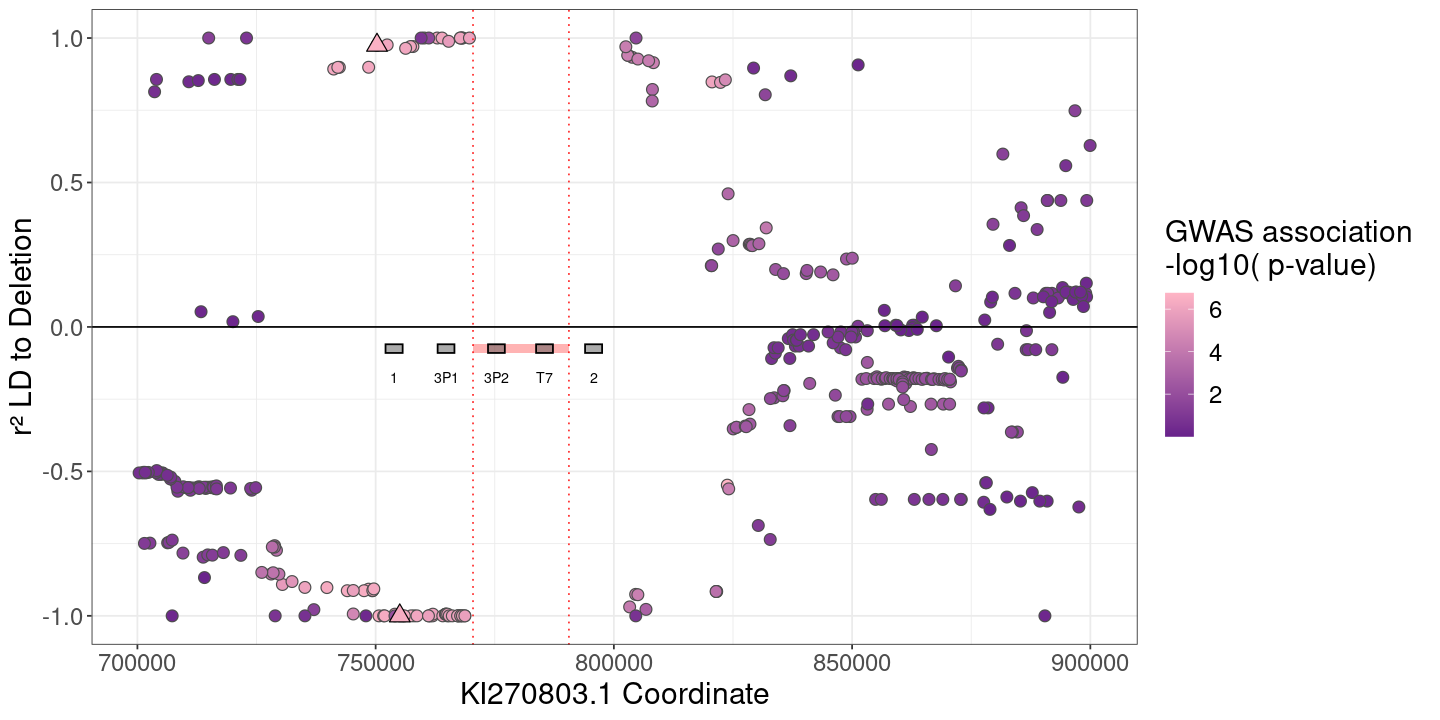

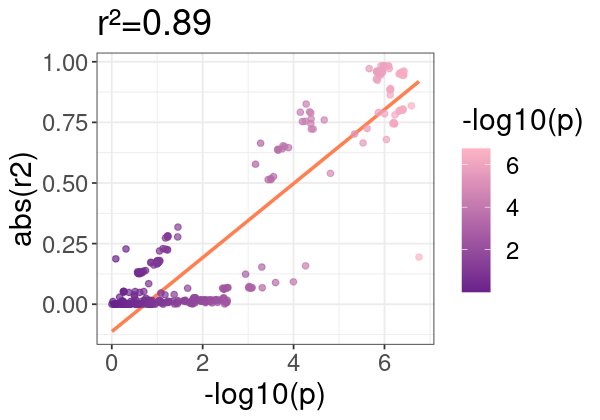

In [578]:
plot.df <- merge(gwas.df, variant.df, by="pos")
plot.df <- plot.df[plot.df$pos < GAP_START | plot.df$pos > GAP_END,]
plot.df <- plot.df[order(plot.df$p),]

p <- ggplot(plot.df, aes(x=pos, y=dprime, fill=-log10(p))) +
  geom_point(shape=21, size=3, color="grey30") + # xlim(700000, 850000) +
  geom_hline(yintercept = 0, color="black") +
  scale_fill_continuous(low="darkorchid4", high="pink1", guide="colorbar", na.value=NA) +
  geom_point(data=plot.df[plot.df$pos %in% c(GWAS_TOP,755059),], shape=24, size=4) + 
  labs(fill = "GWAS association \n-log10( p-value)")
p <- add_theme(p, xlab="KI270803.1 Coordinate", ylab="r² LD to Deletion")
p <- add_gene_rectangles(p, short=TRUE, size=3, thick=0.08, vjust=1.2)

h=6 ; w=12
options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("del_coorelation.svg"), p, width=w, height=h)
p

p <- ggplot(plot.df, aes(x=-log10(p), y=abs(r2), colour=-log10(p))) +
     geom_smooth(method = "lm", se = FALSE, colour="coral") + geom_point(alpha=0.7) +
     scale_colour_continuous(low="darkorchid4", high="pink1", guide="colorbar", na.value=NA)

r2 <- cor(x=-log10(plot.df$p), y=abs(plot.df$r2), use="complete.obs")
p <- add_theme(p, title=paste("r²=",round(r2,2),sep=""))
h=3.5 ; w=5
options(repr.plot.width=w, repr.plot.height=h)

p

Haplotype data produced by 10X Long Ranger alignments were clustered using k-means. Missing or unphased variant calls were imputed using a nearest neighbour approach prior to clustering. Variants between positions 748818 and 799779 clusters on the alternate contig KI270803.1 were used to generate 4 haplotype clusters. Above shows a PCA plot of the clusters.

In [733]:
subset.df <- array.df[array.df$cohort=="TOR",]

samps <- c(sapply(subset.df$sample, paste, ".1", sep=""), sapply(subset.df$sample, paste, ".2", sep=""))
hmat <- imputed.hap.matrix[, colnames(imputed.hap.matrix) %in% samps]

y <- as.numeric(hmat[rownames(hmat) == GWAS_TOP, ])

ld.df <- do.call(rbind, ( lapply(rownames(hmat), FUN=calculate_ld, y=y, mat=hmat)) )
ld.df <- ld.df[!is.na(ld.df$r2),]
ld.df <- ld.df[ld.df$r2 > 0.6,]

PHASE_POS <- ld.df$pos

In [1001]:
cluster_regression2 <- function(pdf){
    
    clusters <- unique(pdf$cluster.1)
    equ <- "mi ~ sex"
    for (cluster in clusters){
        name=paste("cluster", cluster, sep="_")
        pdf[,name] <- str_count(pdf$cluster, pattern=cluster)
        equ <- paste(equ, "+", name)
    }
    
    if (length(unique(as.character(pdf$platform))) > 1){ equ <- paste(equ, "+ platform") }
    if (length(unique(as.character(pdf$ncohort))) > 1) { equ <- paste(equ, "+ cohort")   }

    model=glm(as.formula(equ), family="binomial", data=pdf)
    
    return(model)
}

In [888]:
make_confusion_matrix <- function(predicted, expected){
    res <- data.frame(pred=predicted, exp=expected)
    levels=unique(c(unique(as.character(res$pred)), unique(as.character(res$exp))))
    res$pred <- factor(res$pred, levels)
    res$exp <- factor(res$exp, levels)
 
    confusionMatrix(res$pred, res$exp)
}

olap <- intersect(clusters$df$sample, imputed.clusters$df$sample)

merge.df <- merge(clusters$hap.df, imputed.clusters$hap.df, by="sample", all.x=TRUE)

make_confusion_matrix(merge.df$cluster.x, merge.df$cluster.y )


Confusion Matrix and Statistics

          Reference
Prediction   D   A   C   B   2
         D 305   0   0   5   0
         A   0   0 392   4   1
         C   1   0   3   0   0
         B   1   0   0   2   0
         2   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.4342          
                 95% CI : (0.3975, 0.4714)
    No Information Rate : 0.5532          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3016          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: D Class: A Class: C Class: B Class: 2
Sensitivity            0.9935       NA 0.007595 0.181818 0.000000
Specificity            0.9877    0.444 0.996865 0.998578 1.000000
Pos Pred Value         0.9839       NA 0.750000 0.666667      NaN
Neg Pred Value         0.9950       NA 0.447887 0.987342 0.998599
P

C          D          2          B 
0.00000000 0.99870550 0.05084746 0.82926829

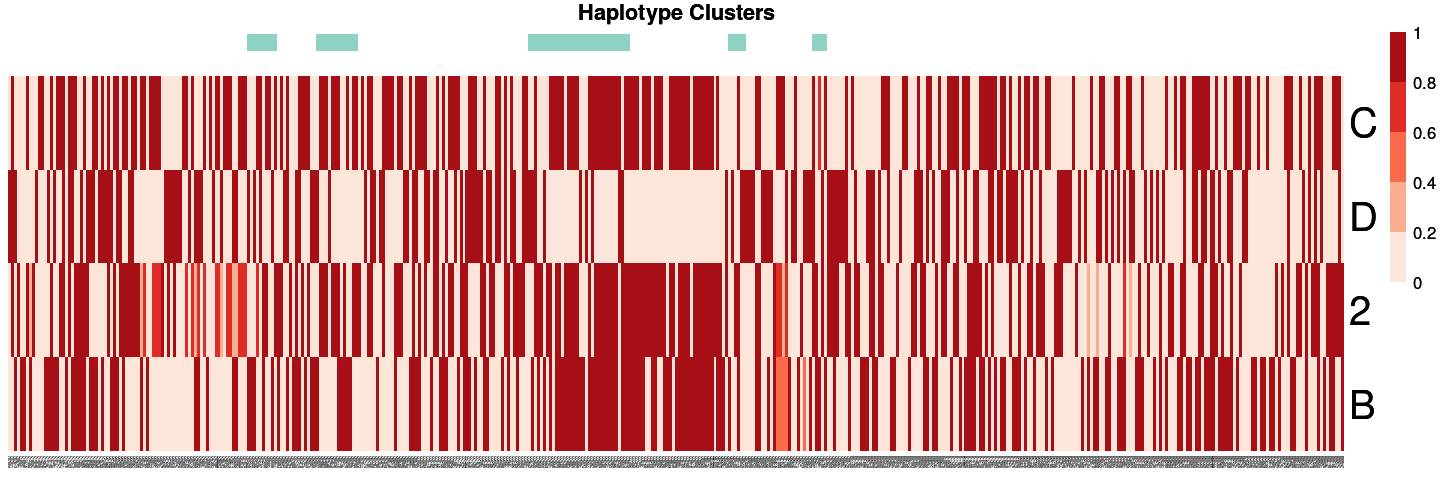

In [741]:
imputed.collapsed.mat <- collapse_clusters(imputed.clusters$hap.df, hmat, variant.df, by.minor.allele=TRUE)
imputed.collapsed.mat[,colnames(imputed.collapsed.mat) == DEL_POS]
#m[,colnames(m)>GAP_START & colnames(m)<GAP_END ]

m <- imputed.collapsed.mat[,colVars(imputed.collapsed.mat, na.rm=TRUE) > 0.15]

rects <- data.frame(name=c("PRSS1", "PRSS3P1", "PRSS3P2", "TRY7", "PRSS2"), 
             start=c(752075, 763009, 773585, 783677, 793955),
             end=c(755667, 766538, 777110, 787211, 797532))

annot = as.numeric(colnames(m) %in% c(PHASE_POS)) 
genes = rep(NA, length(colnames(m)))
for (i in 1:nrow(rects)){ genes[colnames(m) >= rects[i,"start"] & colnames(m) <= rects[i,"end"]] <- 1 }
annot <- data.frame(clust = factor(annot), gene=genes)
rownames(annot) <- colnames(m)

cl <- c(NA, "lightcoral")
names(cl) <- c(0,1)
ann.col <- list(clust=cl)
p <- pheatmap(m, color=RColorBrewer::brewer.pal(5, "Reds"), 
              fontsize_col=2, fontsize_row=24, cluster_rows=FALSE,
              scale = "none", cluster_cols=FALSE, main="Haplotype Clusters",
              annotation=annot, annotation_colors=ann.col,
              annotation_legend=FALSE, annotation_names_col=FALSE)

w=12 ; h=4

options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("cluster_barcodes_imputed.svg"), p, width=w, height=h)
p

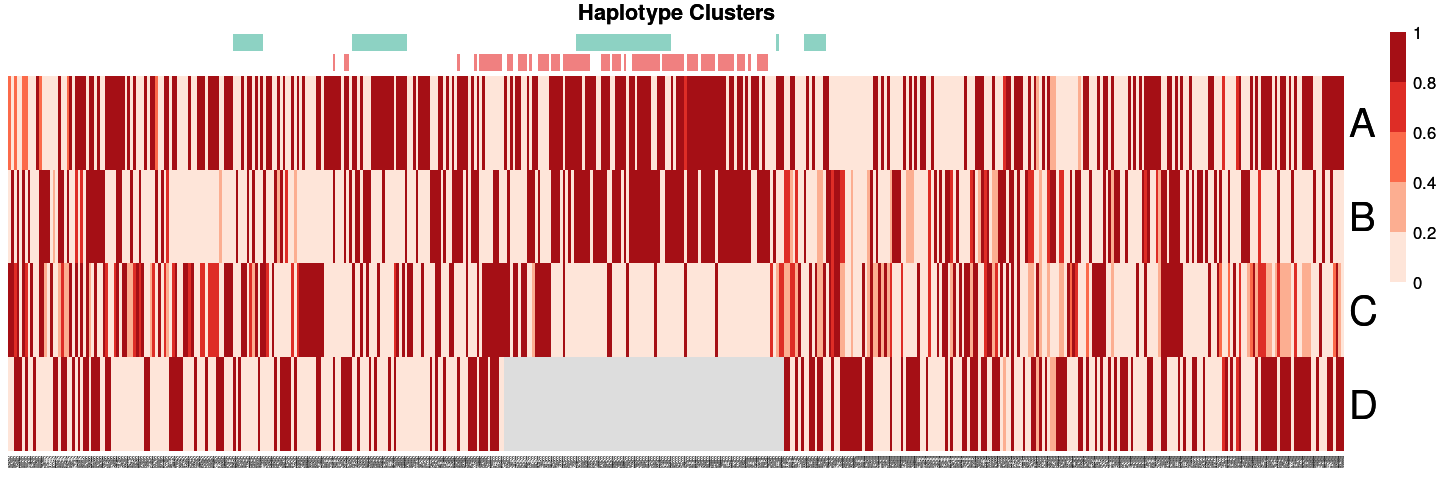

In [722]:
collapsed.mat <- collapse_clusters(clusters$hap.df, imputed.hap.mat, variant.df, by.minor.allele=TRUE)

m <- collapsed.mat[,colVars(collapsed.mat, na.rm=TRUE) > 0.15]

rects <- data.frame(name=c("PRSS1", "PRSS3P1", "PRSS3P2", "TRY7", "PRSS2"), 
             start=c(752075, 763009, 773585, 783677, 793955),
             end=c(755667, 766538, 777110, 787211, 797532))

annot = as.numeric(colnames(m) %in% c(SIG_POS)) #as.numeric(colnames(m)>START_CLUSTER & colnames(m)< END_CLUSTER)
genes = rep(NA, length(colnames(m)))
for (i in 1:nrow(rects)){
    genes[colnames(m) >= rects[i,"start"] & colnames(m) <= rects[i,"end"]] <- 1
}

annot <- data.frame(clust = factor(annot), gene=genes)
rownames(annot) <- colnames(m)

cl <- c(NA, "lightcoral")
names(cl) <- c(0,1)
ann.col <- list(clust=cl)

p <- pheatmap(m[c("A","B","C","D"), ], color=RColorBrewer::brewer.pal(5, "Reds"), 
              fontsize_col=2, fontsize_row=24, cluster_rows=FALSE,
              scale = "none", cluster_cols=FALSE, main="Haplotype Clusters",
              annotation=annot, annotation_colors=ann.col,
              annotation_legend=FALSE, annotation_names_col=FALSE)

w=12 ; h=4

options(repr.plot.width=w, repr.plot.height=h)
ggsave(out_name("cluster_barcodes.svg"), p, width=w, height=h)
p

Heatmap illustrating distinct haplotypes with respect to positions 700000-900000 on alternate contig KI270803.1. For each haplotype group, the proportion of individuals with the major allele is plotted as a column on the heatmap. The rectangle along the top denotes which variants were considered during clustering

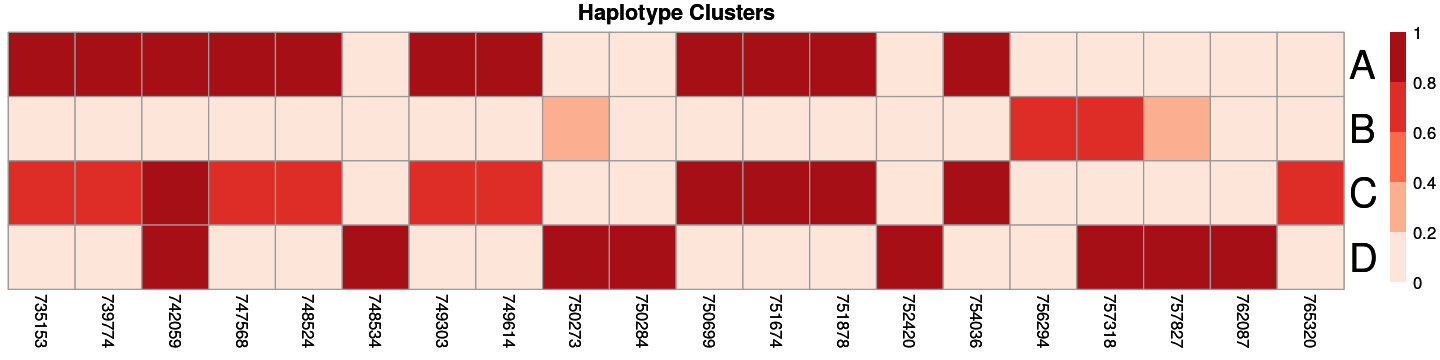

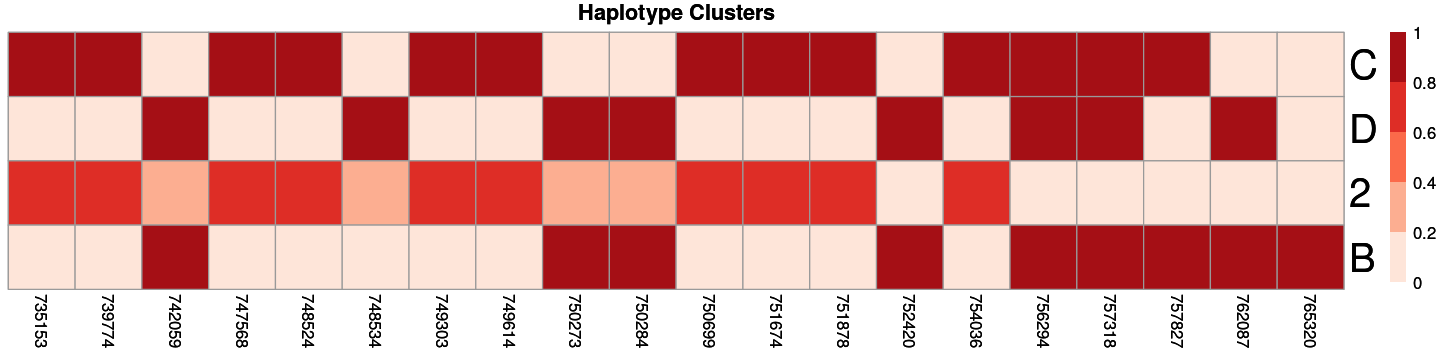

In [1449]:
heatmap <- function(POS, w=12, h=3){

    m1 <- collapsed.mat[,as.numeric(colnames(collapsed.mat)) %in% POS]
    m2 <- imputed.collapsed.mat[,as.numeric(colnames(imputed.collapsed.mat)) %in% POS]

    p <- pheatmap(m1[c("A","B","C","D"),], color=RColorBrewer::brewer.pal(5, "Reds"), 
                fontsize_row=24, cluster_rows=FALSE,
                  scale = "none", cluster_cols=FALSE, main="Haplotype Clusters",
                  annotation_legend=FALSE, annotation_names_col=FALSE)

    options(repr.plot.width=w, repr.plot.height=h)
    print(p)

    p <- pheatmap(m2, color=RColorBrewer::brewer.pal(5, "Reds"), 
                fontsize_row=24, cluster_rows=FALSE,
                  scale = "none", cluster_cols=FALSE, main="Haplotype Clusters",
                  annotation_legend=FALSE, annotation_names_col=FALSE)

    options(repr.plot.width=w, repr.plot.height=h)
    print(p)
}

heatmap(BETTER)



In [718]:
rare.df <- clusters$df[clusters$df$cluster.1 %in% c("B", "C") | clusters$df$cluster.2 %in% c("B", "C"),]
rare.df <-merge(rare.df, seq.df, by="sample", all.x=TRUE)

rare.df[!duplicated(rare.df$sample),]

sample       cluster.1 cluster.2 cluster mi pi dup del
1  BSP21041_03A D         C         CD       0 PI 1   1  
3  BSP21078_03A A         C         AC      NA PI 2   0  
5  OSK7142_03A  A         B         AB       1 PI 2   0  
7  OSK7216_03A  C         D         CD       1 PI 1   1  
9  OSK7719_03A  B         D         BD       1 PI 1   1  
11 OSM7293_03A  B         C         BC       1 PI 2   0

In [ ]:
seq_cluster_regression <- function(cluster, cluster2=NA, cov=NA){
    
    cdf <- merge(seq.df, clusters$df, all.x=TRUE, by="sample")
    cdf <- cdf[!duplicated(cdf$sample),]
    cdf <- cdf[!is.na(cdf$cluster) & cdf$mi %in% c(0,1) & cdf$pi %in% "PI" & cdf$del %in% c(0,1,2),]
    cdf$count <- str_count(cdf$cluster, pattern=cluster)
    if (! is.na(cluster2)){ cdf$count <- cdf$count + str_count(cdf$cluster, pattern=cluster2) }
    
    cdf <- cdf[!cdf$sample %in% rare.df$sample , ]
    
    model=glm(mi ~ count, family="binomial", data=cdf)
    
    coef <- summary(model)$coefficients
    df <- data.frame(beta=coef[,1], p=coef[,4])
    df$var <- row.names(df)
    df$cluster <- cluster
    row.names(df) <- NULL
    n <- 2*nrow(cdf)
    df$mi.0 <- nrow(cdf[cdf$count==0 & cdf$mi == 1,])/sum(cdf$count==0)
    df$mi.1 <- nrow(cdf[cdf$count==1 & cdf$mi == 1,])/sum(cdf$count==1)
    df$mi.2 <- nrow(cdf[cdf$count==2 & cdf$mi == 1,])/sum(cdf$count==2)
    df$n <- nrow(cdf)
    df$count <- sum(cdf$count)
    df <- df[df$var == "count",]
    return(df)
}

do.call(rbind, lapply(c("A","B","C","D"), FUN=seq_cluster_regression))
#seq_cluster_regression("B", "C")


In [ ]:
make_confusion_matrix <- function(predicted, expected){
    res <- data.frame(pred=predicted, exp=expected)
    levels=unique(c(unique(as.character(res$pred)), unique(as.character(res$exp))))
    res$pred <- factor(res$pred, levels)
    res$exp <- factor(res$exp, levels)
 
    confusionMatrix(res$pred, res$exp)
}

odf = overlap.df
odf$sample <- odf$array.id
odf <- merge(odf, predict.df, by="sample", suffixes=c("",".array"))
odf$sample <- odf$seq.id
odf <- merge(odf, clusters$df[!duplicated(clusters$df$sample),], by="sample", suffixes=c(".array", ".seq"))

make_confusion_matrix(odf$cluster.array, odf$cluster.seq)

odf[!odf$cluster.array == odf$cluster.seq,]

#overlap.df
#predict.df[predict.df$sample %in% overlap.df$array.id, ]
#y2=sapply(overlap.df$array.id, function(x) as.character(predict.df[predict.df$sample == as.character(x), ]$del.prediction))
#make_confusion_matrix(str_count(x1, "D"),y2)


In [ ]:
groups <- unique(clusters$hap.df$cluster)

add.del=FALSE
pdf <- predict.df[predict.df$mean.del.prob > 0.85,]
print(paste(nrow(predict.df), nrow(pdf)))

d1 <- do.call("rbind", lapply(groups, FUN=function(x) 
                cluster_regression(x, pdf=pdf, add.del=add.del)))

d2 <- do.call("rbind", lapply(as.character(unique(pdf$cohort)),
    FUN=function(cohort) do.call("rbind", lapply(groups, cluster_regression, 
                 pdf=pdf, samples=pdf[pdf$cohort == cohort,]$sample, 
                 note=cohort, add.del=add.del))))
         
d3 <- do.call("rbind", lapply(as.character(unique(pdf$platform)),
    FUN=function(platform) do.call("rbind", lapply(groups, cluster_regression,
                pdf=pdf, samples=pdf[pdf$platform == platform,]$sample, 
                 note=platform, add.del=add.del))))

d1[order(d1$cluster),]
d2[order(d2$cluster),]
d3[order(d3$cluster),]

---

In [ ]:
for (co in unique(predict.df$cohort)){
    print(co)
    print(table(predict.df[predict.df$cohort == co & predict.df$mean.prob > 0.98,]$platform))
}

print("--------")

for (co in unique(predict.df$cohort)){
    print(co)
    print(table(predict.df[predict.df$cohort == co & predict.df$mean.prob > 0.98,]$cluster))
}

In [ ]:
mi_prop <- function(snp.pos){
    count.df <- data.frame(gt=imputed.matrix[rownames(imputed.matrix) == snp.pos], sample=colnames(imputed.matrix))
    count.df <- merge(predict.df, count.df, by="sample", all.x=TRUE)
    
    print (sapply(0:2, FUN=function(i) nrow(count.df[count.df$gt == i,])))
    return (sapply(0:2, FUN=function(i) mean(count.df[count.df$gt == i,]$mi)))

}

print(GWAS_TOP)
mi_prop(GWAS_TOP)
print(GWAS_TOP2)
mi_prop(GWAS_TOP2)

mean(predict.df$mi)

In [ ]:
count.df <- data.frame(gt1=imputed.matrix[rownames(imputed.matrix) == GWAS_TOP],
                       gt2=imputed.matrix[rownames(imputed.matrix) == GWAS_TOP2],
                       sample=colnames(imputed.matrix))

count.df <- merge(predict.df, count.df, by="sample", all.x=TRUE)
count.df$score <- count.df$gt1 + (2-count.df$gt2)

print (sapply(0:4, FUN=function(i) mean(count.df[count.df$score == i,]$mi)))
print (sapply(0:4, FUN=function(i) nrow(count.df[count.df$score == i,])))

p <- ggplot(count.df, aes(x=as.numeric(score), y=as.numeric(as.character(del.prediction)))) + 
     geom_point(size=2, alpha=0.3, position=position_jitter(height=0.2, width=0.2)) 
p <- add_theme(p, xlab="Cluster", ylab="Score")
p
ggplot(count.df$score, as.numeric(count.df$del.prediction))
              
count.df$class <- as.character(paste(count.df$gt1 ,(2-count.df$gt2)))
print (sapply(unique(count.df$class), FUN=function(x) mean(count.df[count.df$class == x,]$mi)))
print (sapply(unique(count.df$class), FUN=function(x) nrow(count.df[as.character(count.df$class) == x,])))


In [ ]:

for(x in c("A","B","C","D")){
    cluster.count <- str_count(count.df$cluster, x)
    print(x)
    print(cor(cluster.count, count.df$gt2))
    
    
}


In [ ]:
gt1=hap.matrix[rownames(hap.matrix) == GWAS_TOP]
gt2=hap.matrix[rownames(hap.matrix) == GWAS_TOP2]

gt.df <- data.frame(hap=colnames(hap.matrix), del=del.status, gt1=gt1, gt2=gt2)
gt.df <- gt.df[rowSums(is.na(gt.df)) < 1, ]

sum(gt.df$gt1 == gt.df$del)/nrow(gt.df)
sum(gt.df$gt2 != gt.df$del)/nrow(gt.df)=

sub.gt.df<-gt.df[!gt.df$gt1 == gt.df$del,]
sum(sub.gt.df$gt2 != sub.gt.df$del)/nrow(sub.gt.df)

In [ ]:
tdf <- data.frame(snp=imputed.matrix[rownames(imputed.matrix) ==GWAS_TOP2], sample=colnames(imputed.matrix))
adf <- predict.df
adf <- merge(adf, tdf, by="sample", all.x=TRUE)

p <- ggplot(adf[adf$mean.prob > 0.8,], aes(x=cluster, y=snp, colour=cluster)) + 
     geom_boxplot() +
     geom_point(size=2, alpha=0.3, position=position_jitter(height=0.3, width=0.3)) 
p <- add_theme(p, xlab="Cluster", ylab="Score")
p

In [ ]:
tdf <- data.frame(snp=gt.matrix[rownames(gt.matrix) ==GWAS_TOP2], sample=colnames(gt.matrix))
adf <- clusters$df
adf <- merge(adf, tdf, by="sample", all.x=TRUE)


p <- ggplot(adf, aes(x=cluster, y=snp, colour=cluster)) + 
     geom_boxplot() +
     geom_point(size=2, alpha=0.3, position=position_jitter(height=0.3, width=0.3)) 
p <- add_theme(p, xlab="Cluster", ylab="Score")
p

In [ ]:
tdf <- data.frame(snp=gtex.matrix[rownames(gtex.matrix) ==GWAS_TOP2], sample=colnames(gtex.matrix))
adf <- gtex.haps
adf <- merge(adf, tdf, by="sample", all.x=TRUE)


p <- ggplot(adf, aes(x=cluster, y=snp, colour=cluster)) + 
     geom_boxplot() +
     geom_point(size=2, alpha=0.3, position=position_jitter(height=0.3, width=0.3)) 
p <- add_theme(p, xlab="Cluster", ylab="Score")
p

In [ ]:
i=which(rownames(imputed.matrix) == INTERESTING[2])
adf <- predict.df
adf$pi[adf$pi==1] <- "PI"
adf$del <- as.numeric(adf$del.prediction)

m1<-mi_association(i, mat=imputed.matrix, pheno.df=adf, variant.df=variant.df, return.model=T, include.del=F)
m2<-mi_association(i, mat=imputed.matrix, pheno.df=adf, variant.df=variant.df, return.model=T, include.del=T)
summary(m1)
summary(m2)

Correlation to the common deletion polymorphism is shown for 1069 variants. For each variant, r² was calculated with respect to the presence of the deletion polymorphism. Variants are coloured based on the percentage of individuals in each haplotype group that possess the major allele.

### MINOR ALLELE RELATIONSHIP

In [ ]:
adf <- merge(association.df, collapsed.df, by="pos")
adf <- adf[order(adf$x),]
                                      
adf[adf$pos %in% to.flip,]$x <- 1-adf[adf$pos %in% to.flip,]$x  
p <- ggplot( adf, aes(x=pos, y=-log10(p), colour=x, alpha=x)) +
   geom_point() + scale_colour_gradient(low = "grey", high = "red", na.value = "orchid") +
   scale_alpha_continuous(na.value = 0) +
   theme_bw() + xlim(700000, 850000) +
   xlab("chr7 KI270803.1 Coordinate") + ylab("-log10 ( p-value )") + 
   labs(alpha=element_blank(), colour="% with minor allele") +
   facet_wrap(~cluster)
   p <- add_gene_rectangles(p, label=FALSE)
   #p <- p + geom_vline(xintercept = 750217, color="black")
p

Association p-values for 1069 variants are shown. Variants are coloured based on the percentage of individuals in each haplotype group that possess the minor allele.

### BOOTSTRAPPING DIPLOTYPES

### CONFUSION MATRIX FOR OVERLAPPING SAMPLES

In [ ]:
key.variants.df <- as.data.frame(t(array.matrix[rownames(array.matrix) %in% c(INTERESTING, INTERESTING2),]))
key.variants.df <- key.variants.df[,as.character(c(INTERESTING, INTERESTING2))]
colnames(key.variants.df) <- c("VX1", "VX2", "VY1", "VY2")

#reverse VY2
key.variants.df$VY2 <- 2 - key.variants.df$VY2

key.variants.df$sample <- colnames(array.matrix)
key.variants.df <- merge(key.variants.df, array.df, all.x=TRUE, by="sample")
key.variants.df <- key.variants.df[,c("sample", c("VX1", "VX2","VY1", "VY2"), "sex", "mi", "pi", "platform", "cohort")]
key.variants.df <- merge(key.variants.df, predict.df[,c("sample", "del.prediction")], by="sample", all.x=TRUE)
key.variants.df$del <- as.numeric(key.variants.df$del.prediction)


model=glm(mi ~ VX1 + cohort, family="binomial", data=key.variants.df)
summary(model)

model=glm(mi ~ VX1 + del , family="binomial", data=key.variants.df)
summary(model)

cor(key.variants.df$VX1, key.variants.df$del, use="complete.obs")


# GTEX DATA

In [ ]:
set.seed(428)
b.size <- ncol(hap.matrix)*4
b.n <- 7

keep <- as.numeric(rownames(gtex.matrix)) < GAP_START | as.numeric(rownames(gtex.matrix)) > GAP_END
gm <- gtex.matrix[keep,]

gtex.predict.df <- predict_bootstrap(gm, clust=clusters, bootstrap.size=b.size, bootstrap.n=b.n)
table(gtex.predict.df$cluster)

mdf <- merge(gtex.predict.df, gtex.haps[gtex.haps$cluster !=".",], by="sample", all.x=TRUE)
make_confusion_matrix(mdf$cluster.x, mdf$cluster.y)

In [ ]:
score.mat <- gtex.matrix[rownames(gtex.matrix) %in% SIG_POS,]

del <- gtex.matrix[rownames(gtex.matrix) == DEL_POS,]
score.df <- data.frame(sample=colnames(score.mat), score=colSums(score.mat), del=del)
score.df <- merge(score.df, gtex.haps, by="sample")
score.df <- merge(score.df, gtex.expression.df, by="sample", all.x=TRUE)
score.df <- score.df[score.df$gene == "PRSS3P2" | is.na(score.df$gene),]
score.df$source <- "gtex"

p <- ggplot(score.df, aes(x=score, y=expression, colour=cluster)) + 
     geom_point(size=2, alpha=0.7, position=position_jitter(height=0, width=0.15)) 
p <- add_theme(p, xlab="Score", ylab="Normalized Expression")
p

In [ ]:
pdf <- merge(pair.nohom.df, gwas.df, all.x=TRUE, by="pos")
#draw_coloc(pdf[pdf$gene == "PRSS3P2",], "prss3p2_gwas_gtex_coloc.svg", show_gtex=FALSE)

score.mat <- gt.matrix[rownames(gt.matrix) %in% SIG_POS,]
del <- seq.df[seq.df$sample %in% colnames(score.mat),]$del

seq.score.df <- data.frame(sample=colnames(score.mat), score=colSums(score.mat))
seq.score.df <- merge(seq.score.df, seq.df, all.x=TRUE, by="sample")

seq.score.df <- merge(seq.score.df, clusters$df, all.x=TRUE, by="sample")
seq.score.df <- seq.score.df[!duplicated(seq.score.df),]
seq.score.df$source <- "seq"

In [ ]:
keep.cols <- c("sample", "score", "del", "cluster", "source")
full.score.df <- rbind(score.df[,keep.cols], seq.score.df[,keep.cols])

p <- ggplot(full.score.df, aes(x=cluster, y=score, colour=cluster)) + 
     geom_boxplot() +
     geom_point(size=2, alpha=0.7, position=position_jitter(height=0, width=0.15)) +
     facet_wrap(~source)
p <- add_theme(p, xlab="Cluster", ylab="Score")

w=8 ; h=6
options(repr.plot.width=w, repr.plot.height=h)
p

In [ ]:
pos <- 769685
#pos <- INTERESTING[2]
pos <- GWAS_TOP2

df1 <- data.frame(gt=gtex.matrix[rownames(gtex.matrix) == pos,], sample=colnames(gtex.matrix))
df2 <- data.frame(gt=gt.matrix[rownames(gt.matrix) == pos,], sample=colnames(gt.matrix))

df <- rbind(df1, df2)
df <- merge(df, full.score.df, by="sample")


p <- ggplot(df, aes(x=cluster, y=gt, colour=cluster)) + 
     geom_boxplot() + facet_wrap(~source) +
     geom_point(size=2, alpha=0.6, position=position_jitter(height=0, width=0.45))
p <- add_theme(p, xlab="Cluster", ylab="Genotype")

w=10 ; h=8
options(repr.plot.width=w, repr.plot.height=h)

p

### HAPLOTYPE/VARIANT ENTROPY

In [ ]:
get_group <- function(sample){ return(combo.clusters[combo.clusters$sample == sample,]$group) }
hap.group <- sapply(rownames(imputed.mat), get_group)

sub.imputed.mat <- imputed.mat
#sub.classes <- c( "B.δ", "D.δ")
#sub.imputed.mat <- imputed.mat[hap.group %in% sub.classes, ]
#hap.group <- hap.group[hap.group %in% sub.classes]

tree.out <- randomForest(x=sub.imputed.mat, y=as.factor(hap.group),
                        ntree=1000, importance=TRUE)
importance.df <- as.data.frame(importance(tree.out))
importance.df$pos <- rownames(importance.df)

pos <- intersect(rownames(importance.df), association.df$pos)
#pos <- pos[as.numeric(pos) < GAP_START | as.numeric(pos) > GAP_END]

idf <- importance.df[rownames(importance.df) %in% pos,]
adf <- association.df[association.df$pos %in% pos & association.df$var == "genotype",]

importance.df <- merge(idf, adf, by="pos", all.x=TRUE)
colnames(df)

In [ ]:
plot_importance <- function(class, df){
    class <- as.character(class)
    p <- ggplot(df, aes(x=as.numeric(pos), y=abs(df[,class]), colour=p<0.05)) +
      geom_point() + theme_bw() +
      xlab("Position") + ylab("Importance") + labs(colour = "p<0.05")
    p <- add_gene_rectangles(p, label=FALSE)

    return(p)
}
haps <- unique(hap.group)
plots <- lapply(haps, FUN=plot_importance, df=importance.df)

figure <- ggarrange(plotlist=plots,
                    labels = haps, legend="bottom",
                    common.legend=TRUE)
figure

p <- ggplot(importance.df, aes(x=as.numeric(pos), y=abs(MeanDecreaseAccuracy), colour=p<0.05)) +
  geom_point() + theme_bw() +
  xlab("Position") + ylab("MeanDecreaseAccuracy") + labs(colour = "p<0.05")
p <- add_gene_rectangles(p, label=FALSE)
p

write.table(importance.df, "variant_importance.txt", sep="\t", quote=FALSE, row.names = FALSE)


In [ ]:
count_position_class <-function(pos, clusters, gt=1){
    temp.df <- data.frame( gt=hap.matrix[rownames(hap.matrix)==as.character(pos),],
           sample=colnames(hap.matrix))
    temp.df <- merge(clusters, temp.df, by="sample", all.x=TRUE)
    
    return(table(temp.df[temp.df$gt == gt,]$group))
}
target.pos <- 856958
target.pos <- 856761
target.pos <- 764089

target.pos <- 752420
target.pos <- 757318

print("GT=1")
count_position_class(target.pos, combo.clusters, gt=1)
print("GT=0")
count_position_class(target.pos, combo.clusters, gt=0)


In [ ]:
#exploratory
'''
samp="array.id"

print(imputed.gt.matrix[rownames(imputed.gt.matrix)==DEL_POS, samp])
positions <- intersect(rownames(gt.matrix), rownames(imputed.gt.matrix))
seq.sample <- overlap.df[overlap.df$array.id == samp,]$seq.id

g1 <- imputed.gt.matrix[rownames(imputed.gt.matrix) %in% positions, colnames(imputed.gt.matrix) == samp]
g2 <- gt.matrix[rownames(gt.matrix) %in% positions,
                colnames(gt.matrix) == seq.sample]

filt=is.na(g1) | is.na(g2)
plot.df <- data.frame(diff=g1[!filt] - g2[!filt], pos=as.numeric(positions))

plot.df <- merge(plot.df, quality.df[quality.df$platform =="gwas1",], by="pos")

p <- ggplot(plot.df, aes(x=pos, y=abs(diff), fill=af)) +
    geom_jitter(size=4, shape=21, colour=alpha("black", 0.1), width=0, height=0.1)


plot.df[abs(plot.df$diff)>0,]$af
p <- add_theme(p)
p <- add_gene_rectangles(p)

options(repr.plot.width=9, repr.plot.height=9)
p
'''

In [ ]:
#Exploratory work

'''
cov=c("sex", "platform", "cohort")
association.cohort.df <- mi_association(imputed.gt.matrix, array.df, cov, splitby="cohort")
plot_association(association.cohort.df)

cov=c("platform", "cohort")
gts=c(823976)
association.cohort.right.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.right.df)


cov=c("platform", "cohort")
gts=c(DEL_POS)
association.cohort.del.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.del.df)


cov=c("platform", "cohort")
gts=c(GWAS_TOP)
association.cohort.left.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.left.df, highlight = c(GWAS_TOP))

association.cohort.left.df[-log10(association.cohort.left.df$p)>2 &
                           association.cohort.left.df$group=="TOR" &
                           association.cohort.left.df$var=="gt",]
GWAS_TOP

cov=c("platform", "cohort")
gts=c(GWAS_TOP, DEL_POS)
association.cohort.left.del.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.left.del.df)


cov=c("platform", "cohort")
gts=c(823976)
association.cohort.right.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.right.df)


cov=c("platform", "cohort")
gts=c(823976, DEL_POS)
association.cohort.right.del.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.right.del.df)

cov=c("platform", "cohort")
gts=c(GWAS_TOP, 823976, DEL_POS)
association.cohort.left.right.del.df <- mi_association(imputed.gt.matrix, array.df, 
                                       cov, gt.cov=gts, splitby="cohort")
plot_association(association.cohort.left.right.del.df)
'''